In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

sns.set(rc = {'figure.figsize': (12.0, 10.0)}, font_scale=1.65)

# improve rendering of plots on retina displays
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('../datapackage/quiho/results.csv')

# Preprocessing

In [4]:
df.columns

Index(['giturl', 'commit', 'user', 'timestamp', 'benchmark', 'machine',
       'repetition', 'test', 'result'],
      dtype='object')

In [5]:
df.benchmark.unique()

array(['stressng', 'ssca', 'hpccg', 'scikit-learn', 'redisbench', 'comd',
       'lulesh', 'miniaero', 'miniamr', 'minife', 'fio', 'zlog', 'stream',
       'mysqlslap-mariadb-10.3.2', 'mysqlslap-mariadb-5.5.58', 'mysqlslap'], dtype=object)

In [6]:
df.test.unique()

array(['af-alg', 'atomic', 'bigheap', 'brk', 'bsearch', 'cache', 'cpu',
       'crypt', 'full', 'heapsort', 'hsearch', 'icache', 'lockbus',
       'longjmp', 'lsearch', 'malloc', 'matrix', 'memcpy', 'mincore',
       'mmap', 'mremap', 'msync', 'nop', nan, 'numa', 'oom-pipe', 'opcode',
       'qsort', 'remap', 'resources', 'rmap', 'shm', 'shm-sysv', 'stack',
       'stackmmap', 'str', 'stream', 'tsearch', 'vecmath', 'vm', 'vm-rw',
       'vm-splice', 'zero', 'ssca', 'hpccg', 'sklearn', 'SET', 'GET',
       'LPUSH', 'LPOP', 'comd', 'lulesh', 'miniaero', 'miniamr', 'minife',
       'randread-fiofile-128k-seq', 'randwrite-fiofile-128k-seq',
       'read-fiofile-128k-seq', 'rw-fiofile-128k-seq',
       'write-fiofile-128k-seq', 'randread-fiofile-4096k-seq',
       'randwrite-fiofile-4096k-seq', 'read-fiofile-4096k-seq',
       'rw-fiofile-4096k-seq', 'write-fiofile-4096k-seq',
       'randread-fiofile-4k-seq', 'randwrite-fiofile-4k-seq',
       'read-fiofile-4k-seq', 'rw-fiofile-4k-seq', 'w

In [7]:
df.machine.unique()

array(['c220g1.quiho.schedock-PG0.wisc.cloudlab.us',
       'c220g2.quiho.schedock-PG0.wisc.cloudlab.us',
       'c6220.quiho.schedock-PG0.apt.emulab.net',
       'c6320.quiho.schedock-PG0.clemson.cloudlab.us',
       'c8220.quiho.schedock-PG0.clemson.cloudlab.us',
       'd2100.quiho.Schedock.emulab.net', 'd430.quiho.Schedock.emulab.net',
       'd530.quiho.Schedock.emulab.net', 'd710.quiho.Schedock.emulab.net',
       'd820.quiho.Schedock.emulab.net',
       'dl360.quiho.emulab-net.utahddc.geniracks.net',
       'dwill.soe.ucsc.edu', 'issdm-0',
       'm510.quiho.schedock-PG0.utah.cloudlab.us',
       'pc2400.quiho.emulab-net.uky.emulab.net',
       'pc3000.quiho.Schedock.emulab.net',
       'pc3300.quiho.emulab-net.uky.emulab.net',
       'pc3400.quiho.emulab-net.uky.emulab.net',
       'pc3500.quiho.emulab-net.uky.emulab.net',
       'r320.quiho.schedock-PG0.apt.emulab.net', 'scruffy.soe.ucsc.edu',
       'issdm-41', 'r720.quiho.schedock-PG0.apt.emulab.net',
       'c220g1.quiho-iv

In [8]:
df.sample(5).T

13649  \
giturl                    git@github.com:ivotron/quiho-popper   
commit                                                d46d579   
user                                                      ivo   
timestamp                                       1498013938000   
benchmark                                              stream   
machine     c220g2.quiho-ivotron.schedock-PG0.wisc.cloudla...   
repetition                                                  3   
test                                                 scale-12   
result                                                11437.8   

                                                     12840  \
giturl                 git@github.com:ivotron/quiho-popper   
commit                                             d46d579   
user                                                   ivo   
timestamp                                    1498013938000   
benchmark                                         stressng   
machine     pc3400.quiho-ivotron.emulab-net.uky.emulab.net   
repetition                                               2   
test                                                  zero   
result                                              750077   

                                                26001  \
giturl            git@github.com:ivotron/quiho-popper   
commit                                        d46d579   
user                                              ivo   
timestamp                               1499724178000   
benchmark                                      stream   
machine     m510.quiho2.schedock-PG0.utah.cloudlab.us   
repetition                                          2   
test                                           copy-8   
result                                         1316.2   

                                                        13456  \
giturl                    git@github.com:ivotron/quiho-popper   
commit                                                d46d579   
user                                                      ivo   
timestamp                                       1498013938000   
benchmark                                              stream   
machine     c220g1.quiho-ivotron.schedock-PG0.wisc.cloudla...   
repetition                                                  2   
test                                                  copy-12   
result                                                  12580   

                                                     12680  
giturl                 git@github.com:ivotron/quiho-popper  
commit                                             d46d579  
user                                                   ivo  
timestamp                                    1498013938000  
benchmark                                         stressng  
machine     pc2400.quiho-ivotron.emulab-net.uky.emulab.net  
repetition                                               4  
test                                                icache  
result                                             536.228

In [9]:
# treat every repetition as a new data point
df['machine_id'] = df.apply(lambda x: x['machine'] + '-' + str(x['repetition']) + '-' + str(x['timestamp']), axis=1) 

In [10]:
# the 'null' stressor is loaded as a null string, so let's fix it
df['test'] = df['test'].apply(lambda x: 'null' if pd.isnull(x) else x)

len(df)

27677

In [11]:
# better naming for redis tests
df['test'] = df.apply(lambda x: 'redis-' + x['test'].lower() if x['benchmark'] == 'redisbench' else x['test'], axis=1)

In [12]:
# rename mariadb tests
df['test'] = df.apply(lambda x: 'mariadb-{}-{}'.format(x['benchmark'].split('-')[2], x['test']) if 'mysqlslap-' in x['benchmark'] else x['test'], axis=1)

In [13]:
# what we use for feature vectors
df.query('benchmark == "stressng"')['test'].unique()

array(['af-alg', 'atomic', 'bigheap', 'brk', 'bsearch', 'cache', 'cpu',
       'crypt', 'full', 'heapsort', 'hsearch', 'icache', 'lockbus',
       'longjmp', 'lsearch', 'malloc', 'matrix', 'memcpy', 'mincore',
       'mmap', 'mremap', 'msync', 'nop', 'null', 'numa', 'oom-pipe',
       'opcode', 'qsort', 'remap', 'resources', 'rmap', 'shm', 'shm-sysv',
       'stack', 'stackmmap', 'str', 'stream', 'tsearch', 'vecmath', 'vm',
       'vm-rw', 'vm-splice', 'zero'], dtype=object)

In [14]:
# what we can use to build models (apps whose performance we can learn)
df.query('benchmark != "stressng"')['test'].unique()

array(['ssca', 'hpccg', 'sklearn', 'redis-set', 'redis-get', 'redis-lpush',
       'redis-lpop', 'comd', 'lulesh', 'miniaero', 'miniamr', 'minife',
       'randread-fiofile-128k-seq', 'randwrite-fiofile-128k-seq',
       'read-fiofile-128k-seq', 'rw-fiofile-128k-seq',
       'write-fiofile-128k-seq', 'randread-fiofile-4096k-seq',
       'randwrite-fiofile-4096k-seq', 'read-fiofile-4096k-seq',
       'rw-fiofile-4096k-seq', 'write-fiofile-4096k-seq',
       'randread-fiofile-4k-seq', 'randwrite-fiofile-4k-seq',
       'read-fiofile-4k-seq', 'rw-fiofile-4k-seq', 'write-fiofile-4k-seq',
       'zlog', 'copy-1', 'scale-1', 'add-1', 'triad-1', 'copy-10',
       'scale-10', 'add-10', 'triad-10', 'copy-12', 'scale-12', 'add-12',
       'triad-12', 'copy-14', 'scale-14', 'add-14', 'triad-14', 'copy-16',
       'scale-16', 'add-16', 'triad-16', 'copy-18', 'scale-18', 'add-18',
       'triad-18', 'copy-2', 'scale-2', 'add-2', 'triad-2', 'copy-20',
       'scale-20', 'add-20', 'triad-20', 'copy-3

# Visualize Variability

Let's visualize the variability across these two datasets (training vectors and learneable variable). We will first define a helper function for obtaining the transpose of the dataframe. This turns stressors and applications into columns.

In [15]:
# obtain a list with the name of all the stressors
stressors = list(df.query('benchmark == "stressng"')['test'].unique())

def get_features(in_df):
    # first we transpose (pivot) the matrix so features are columns 
    dff = in_df.pivot_table(index=["machine_id","test"], values=['result'], fill_value=0, aggfunc=np.mean).unstack().reset_index()

    # then we flatten the index and rename the first column
    cols = dff.columns.get_level_values(1).values
    cols[0] = 'machine_id'
    dff.columns = cols

    # cleanup the remaining NaN, Inf values for stressors
    for s in stressors:
        dff = dff[dff[s].notnull()]
        
    return dff

Show executions of the data generation phase (every timestamp is a new execution)

In [16]:
df['timestamp'].unique()

array([   1512873230, 1497974400000, 1497506400000, 1498013938000,
       1499030038000, 1499724178000])

To ease the visualization of the variability, we'll select just one execution. We'll use the entire dataset later

In [17]:
subdf = df.query('timestamp == 1512873230')

In [18]:
# all stressor columns should NOT be NaN. App result
# can be NaN since we don't run all the apps always,
# but we do run stressng always.
data = get_features(subdf)
data.sample(5)

machine_id       af-alg  \
49  pc3400.quiho.emulab-net.uky.emulab.net-1-15128...  7586.687224   
46  pc3300.quiho.emulab-net.uky.emulab.net-1-15128...  9455.933942   
0   c220g1.quiho.schedock-PG0.wisc.cloudlab.us-1-1...  7553.476964   
25        d710.quiho.Schedock.emulab.net-2-1512873230  7550.367401   
47  pc3300.quiho.emulab-net.uky.emulab.net-2-15128...  9438.741805   

           atomic       bigheap            brk     bsearch      cache  \
49  409670.305542   9659.785561  149319.286751  229.642266  16.700087   
46  426814.518379   8670.187444  228822.803412  265.184535  10.500013   
0   699767.049846  35210.011062  684735.448826  370.313794   3.399998   
25  707639.689033  37632.723323  704240.240887  357.459961   3.399987   
47  484103.070060   8599.079885  192896.859410  265.567456  10.900004   

           cpu       crypt           full      ...        stack   stackmmap  \
49  122.459773   91.132279  134084.238465      ...          0.0    1.195709   
46  168.163195   91.735803  135459.346038      ...          0.0    1.409940   
0   269.833322  157.831009  280837.319050      ...          0.0    5.397300   
25  264.815437  156.678439  196518.738545      ...          0.0  343.286888   
47  142.511913   80.405813  138814.982491      ...          0.0    0.313224   

             str     stream    tsearch     vecmath            vm       vm-rw  \
49  10137.875170  23.769046  13.866681  524.743851  29543.628083   47.679112   
46   9161.060501  15.474939  12.567467  644.702333  29401.309834   48.281682   
0   20955.323904  14.517656  17.756406  995.086762  34697.775954  117.267599   
25  19672.943995  14.317946  15.841845  970.174394  34702.555283  114.933936   
47   9492.845492  15.157420  12.577796  606.898119  29383.126208   50.596798   

        vm-splice           zero  
49  294906.114044  364618.603467  
46  276032.601781  341283.085385  
0   588011.993310  701306.704518  
25  564530.974758  719839.614370  
47  256217.518566  332584.730382  

[5 rows x 51 columns]

Now we'll look at the variability of stressors performance across machines



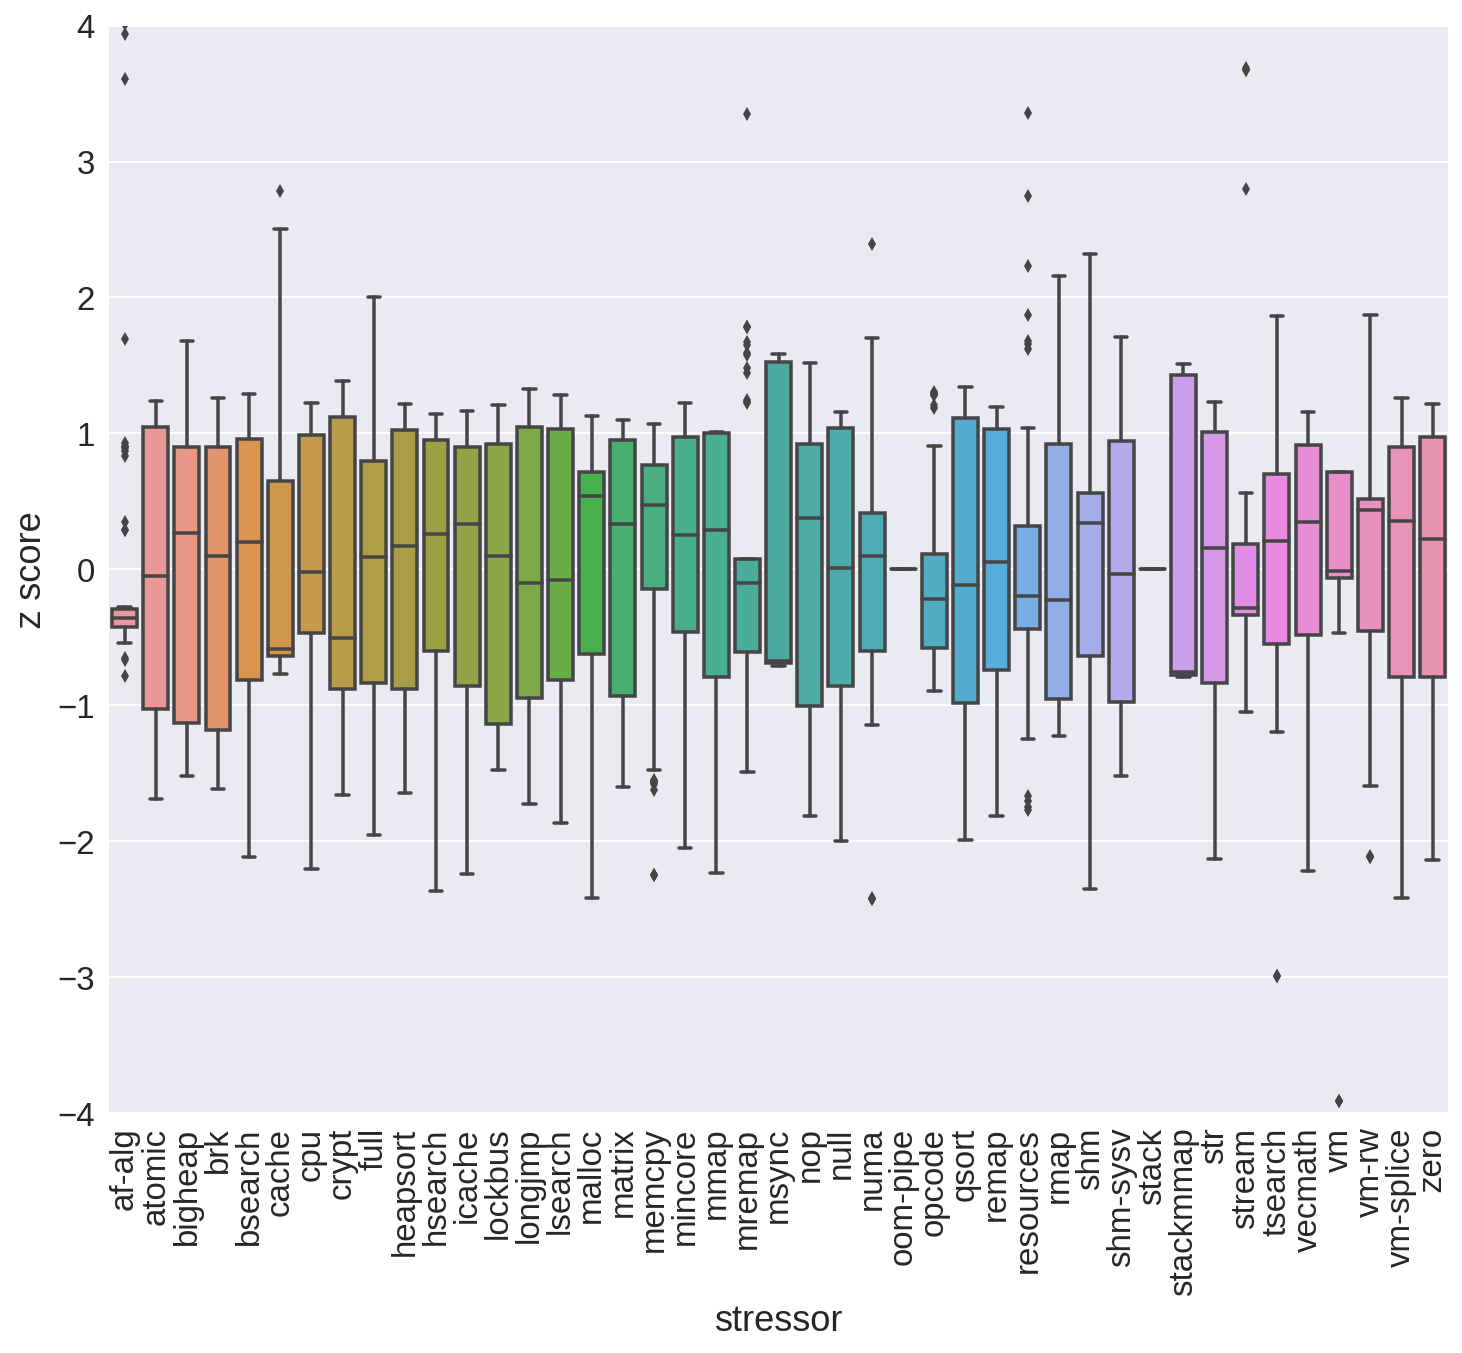

In [19]:
rs = np.random.RandomState(1)
z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data[stressors])

dff = pd.DataFrame(z_data, columns=stressors)

sns.boxplot(data=dff)
_ = plt.xticks(rotation=90)
plt.ylim(-4,4)
plt.ylabel('z score')
plt.xlabel('stressor')
plt.savefig('figures/stressng_variability.png', dpi=300, bbox_inches='tight')

We can also see the variability for some of the applications we are trying to learn

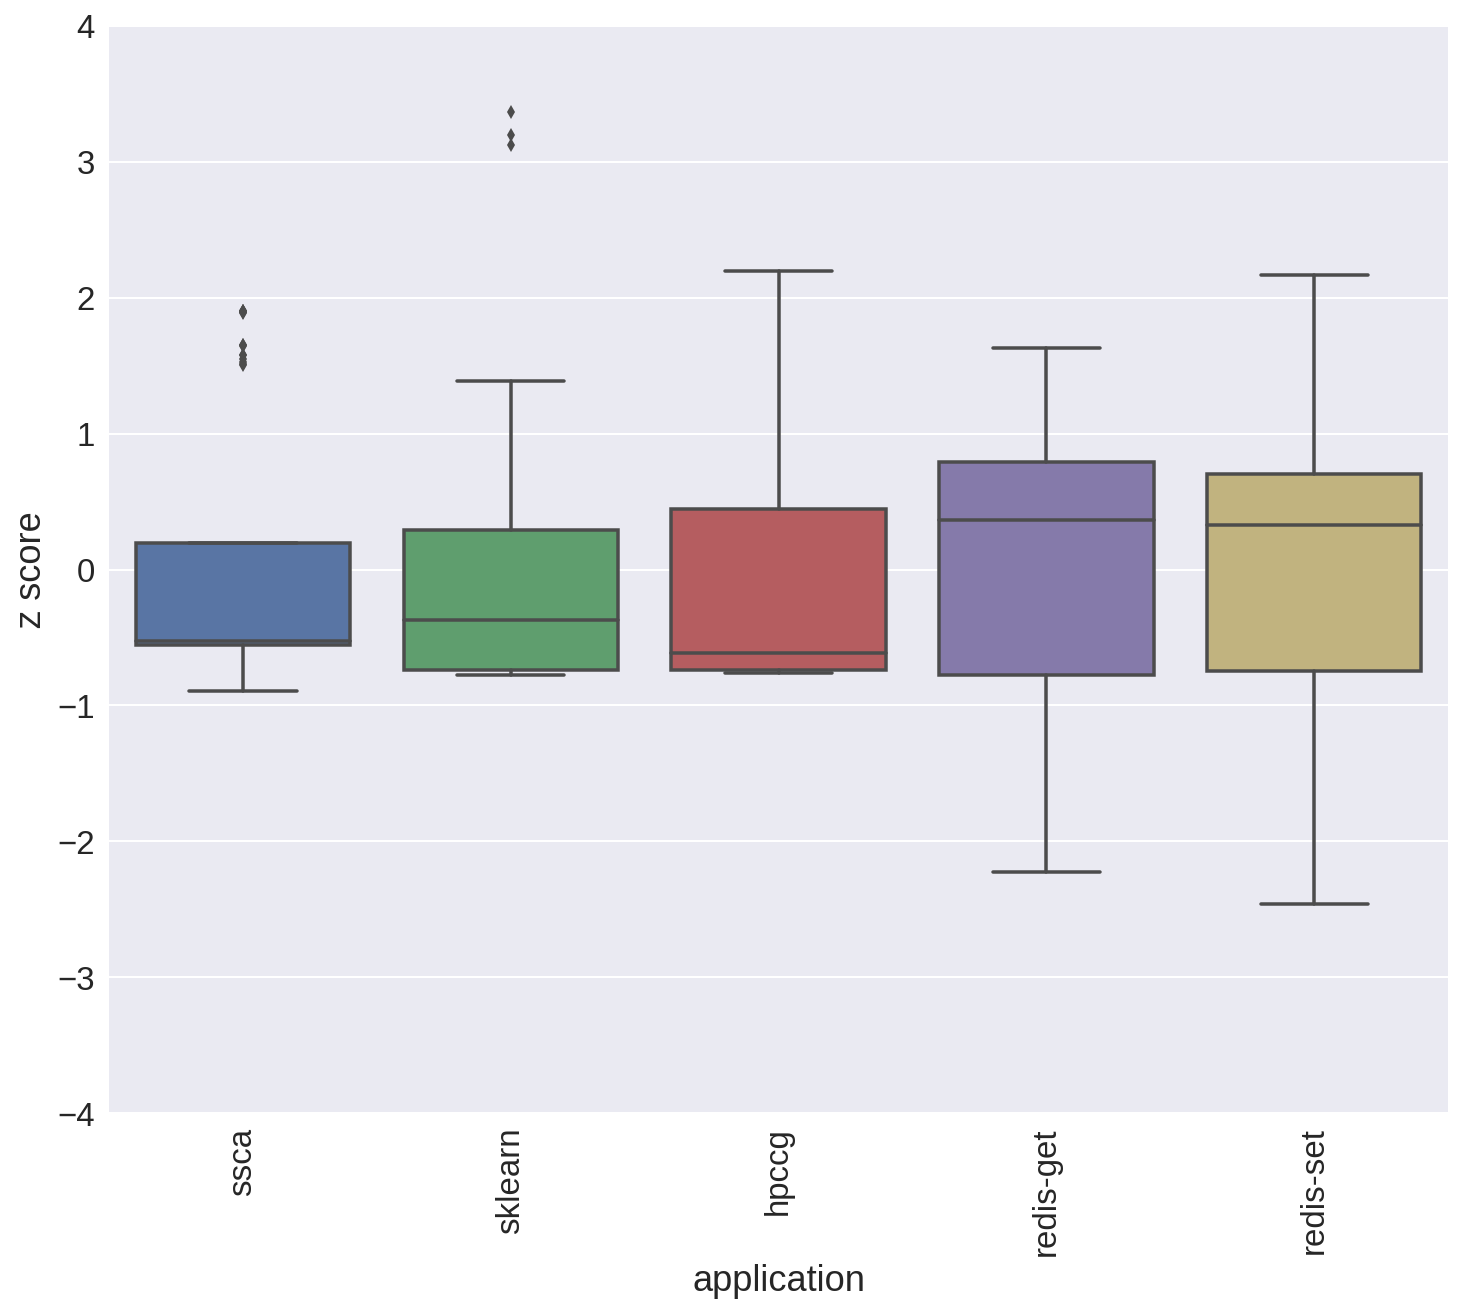

In [20]:
apps_subset = ['ssca', 'sklearn', 'hpccg', 'redis-get', 'redis-set']

rs = np.random.RandomState(1)
z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data[apps_subset].dropna())

dff = pd.DataFrame(z_data, columns=apps_subset)

sns.boxplot(data=dff)
_ = plt.xticks(rotation=90)
plt.ylim(-4,4)
plt.ylabel('z score')
plt.xlabel('application')
plt.savefig('figures/apps_variability.png', dpi=300, bbox_inches='tight')

In [21]:
# let's define a function to obtain and plot pearson correlation coefficients
def plot_corrmatrix(dataf):
    corrmatrix = dataf.corr()
    mask = np.zeros_like(corrmatrix)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corrmatrix, mask=mask,
                xticklabels=corrmatrix.columns.values,
                yticklabels=corrmatrix.columns.values)
    return corrmatrix

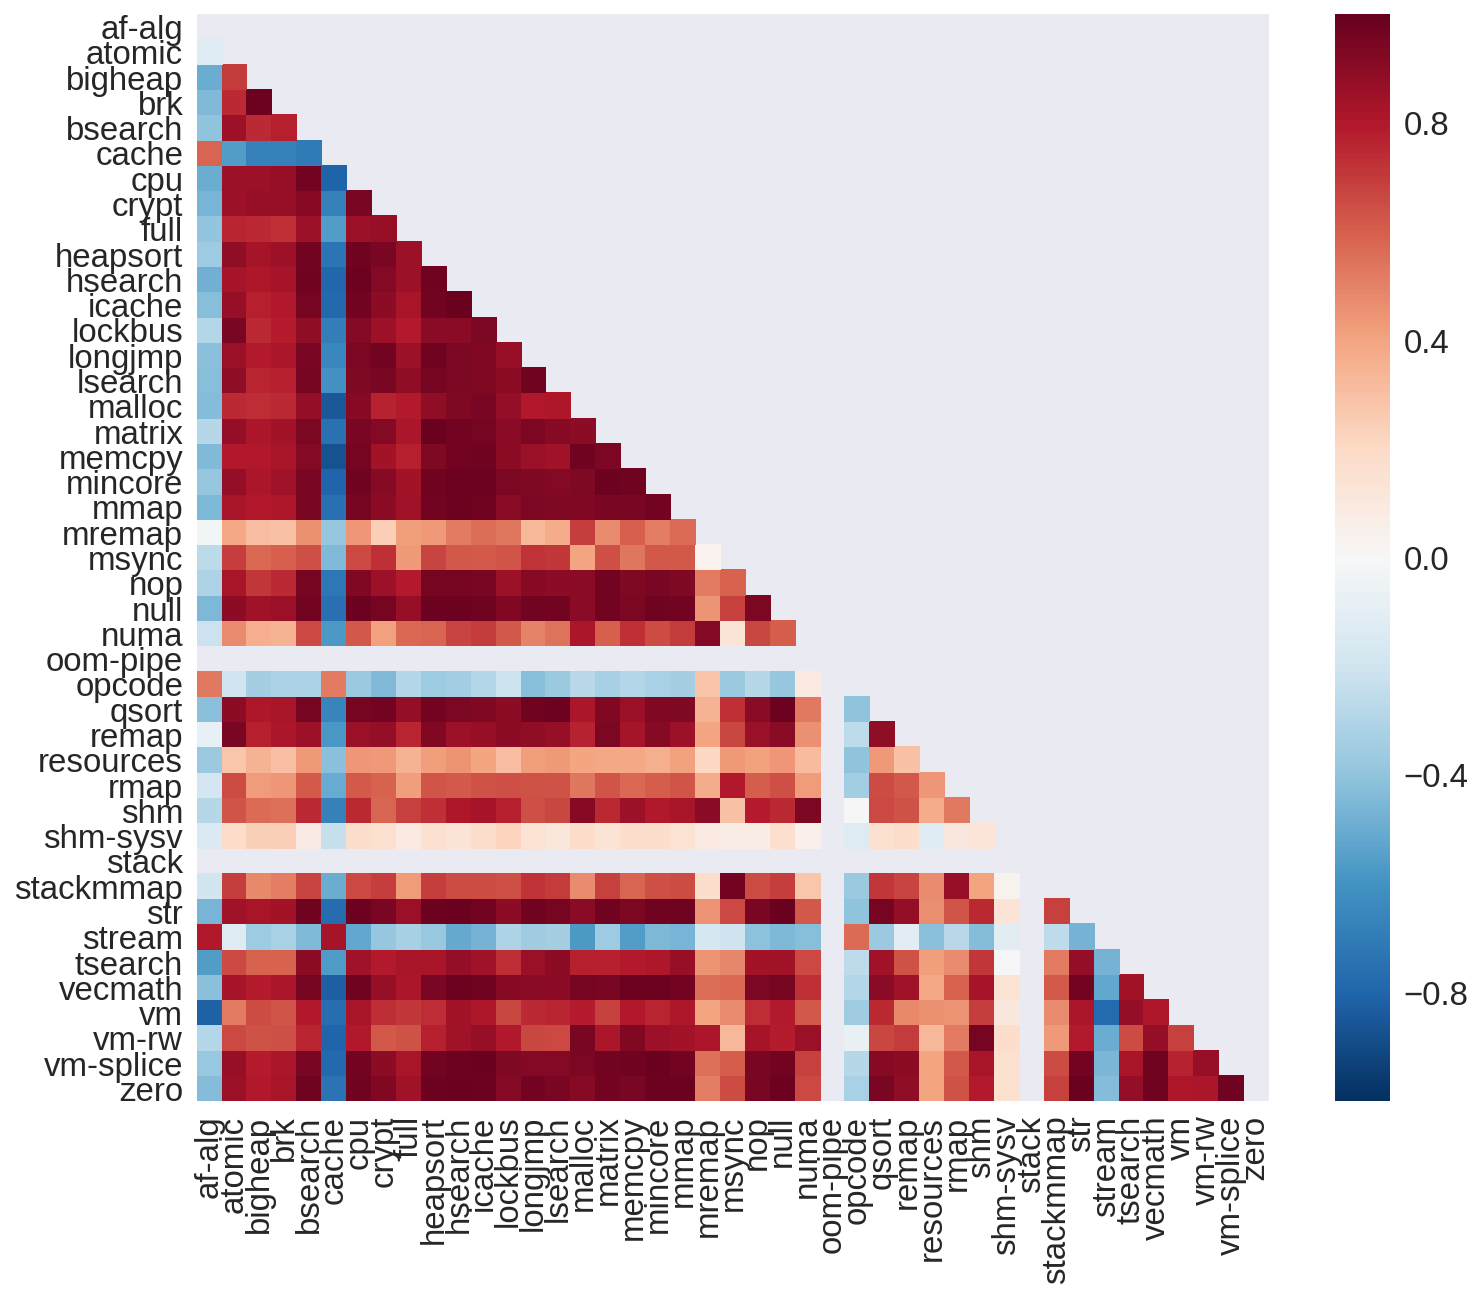

In [22]:
# plot heat map of correlation coefficients
corr_matrix = plot_corrmatrix(data[stressors])
plt.savefig('figures/corrmatrix.png', dpi=300, bbox_inches='tight')

# FGRUPs

Now we will rank features as a way of identifying fine granularity resource utilization. This is done on a per-application basis. We first define the function that plots importance

In [23]:
# gradient boosting regression
# taken from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
# extended to use normalized data

rs = np.random.RandomState(1)
z_scaler = StandardScaler()

def plot_importance(data, feats, apps, file_suffix=''):
    for b in apps:
        # ignore NaN values for app in question
        dff = data[data[b].notnull()]
        
        # normalize data
        z_data = z_scaler.fit_transform(dff[feats])
        
        # fit using random forest regressor
        params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
                  'learning_rate': 0.01, 'loss': 'ls'}
        regr = GradientBoostingRegressor(**params)
        regr.fit(z_data, dff[b])

        # Plot feature importance
        feature_importance = regr.feature_importances_
        # make importances relative to max importance
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(feats)[sorted_idx])
        plt.xlabel('Relative Importance')
        plt.title(b)
        plt.savefig('figures/{}{}.png'.format(b, file_suffix), dpi=300, bbox_inches='tight')
        plt.show()
        plt.clf()

And plot the feature importance for other apps

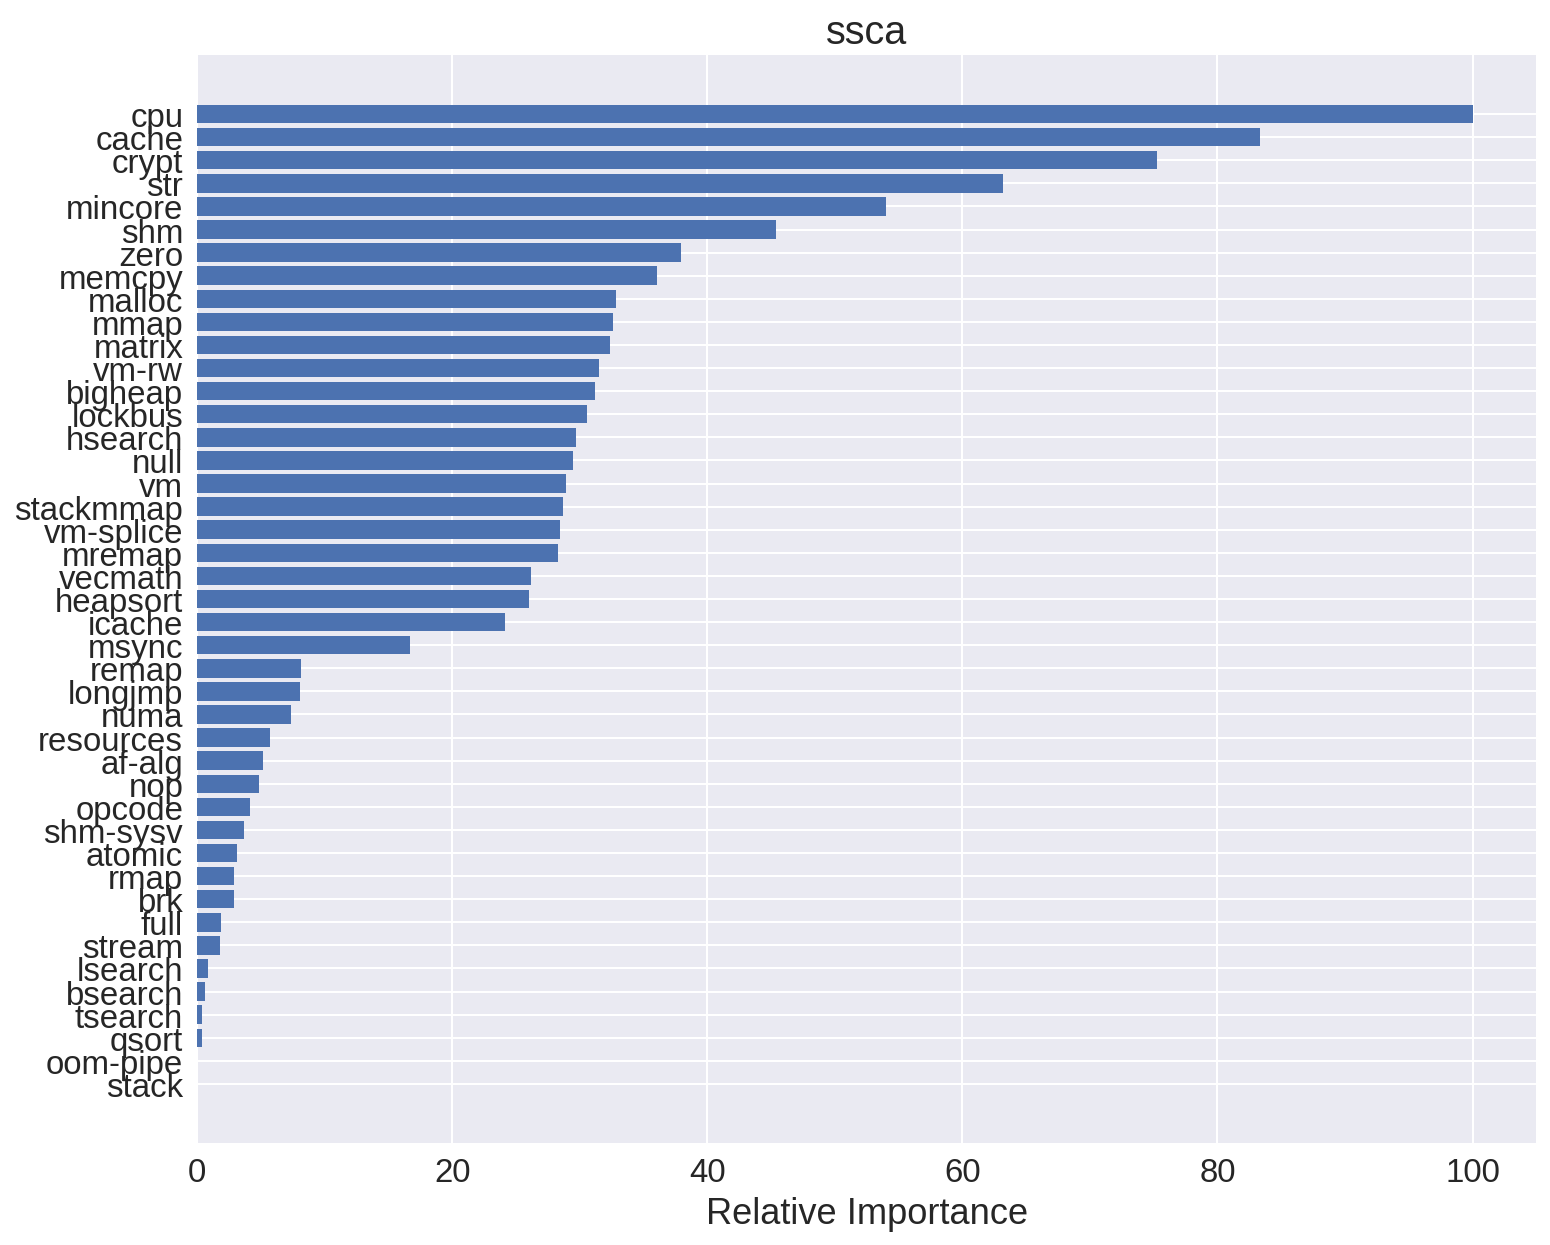

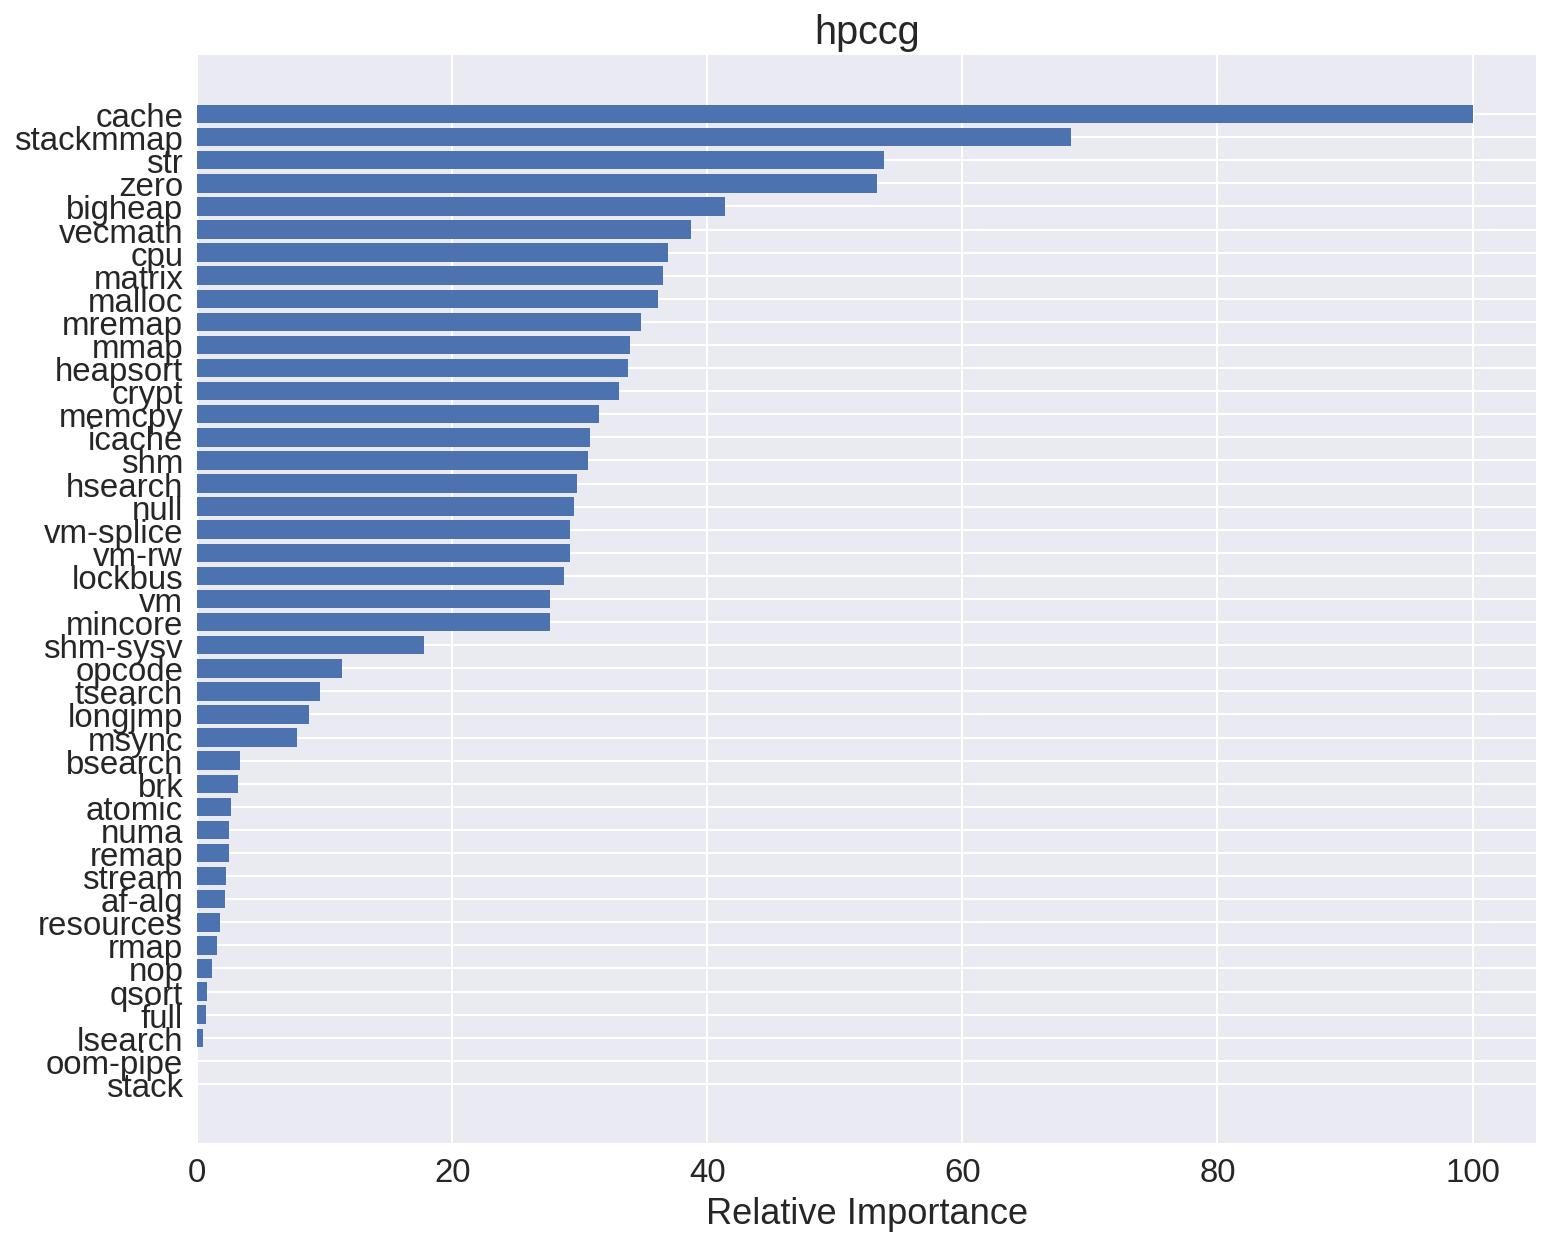

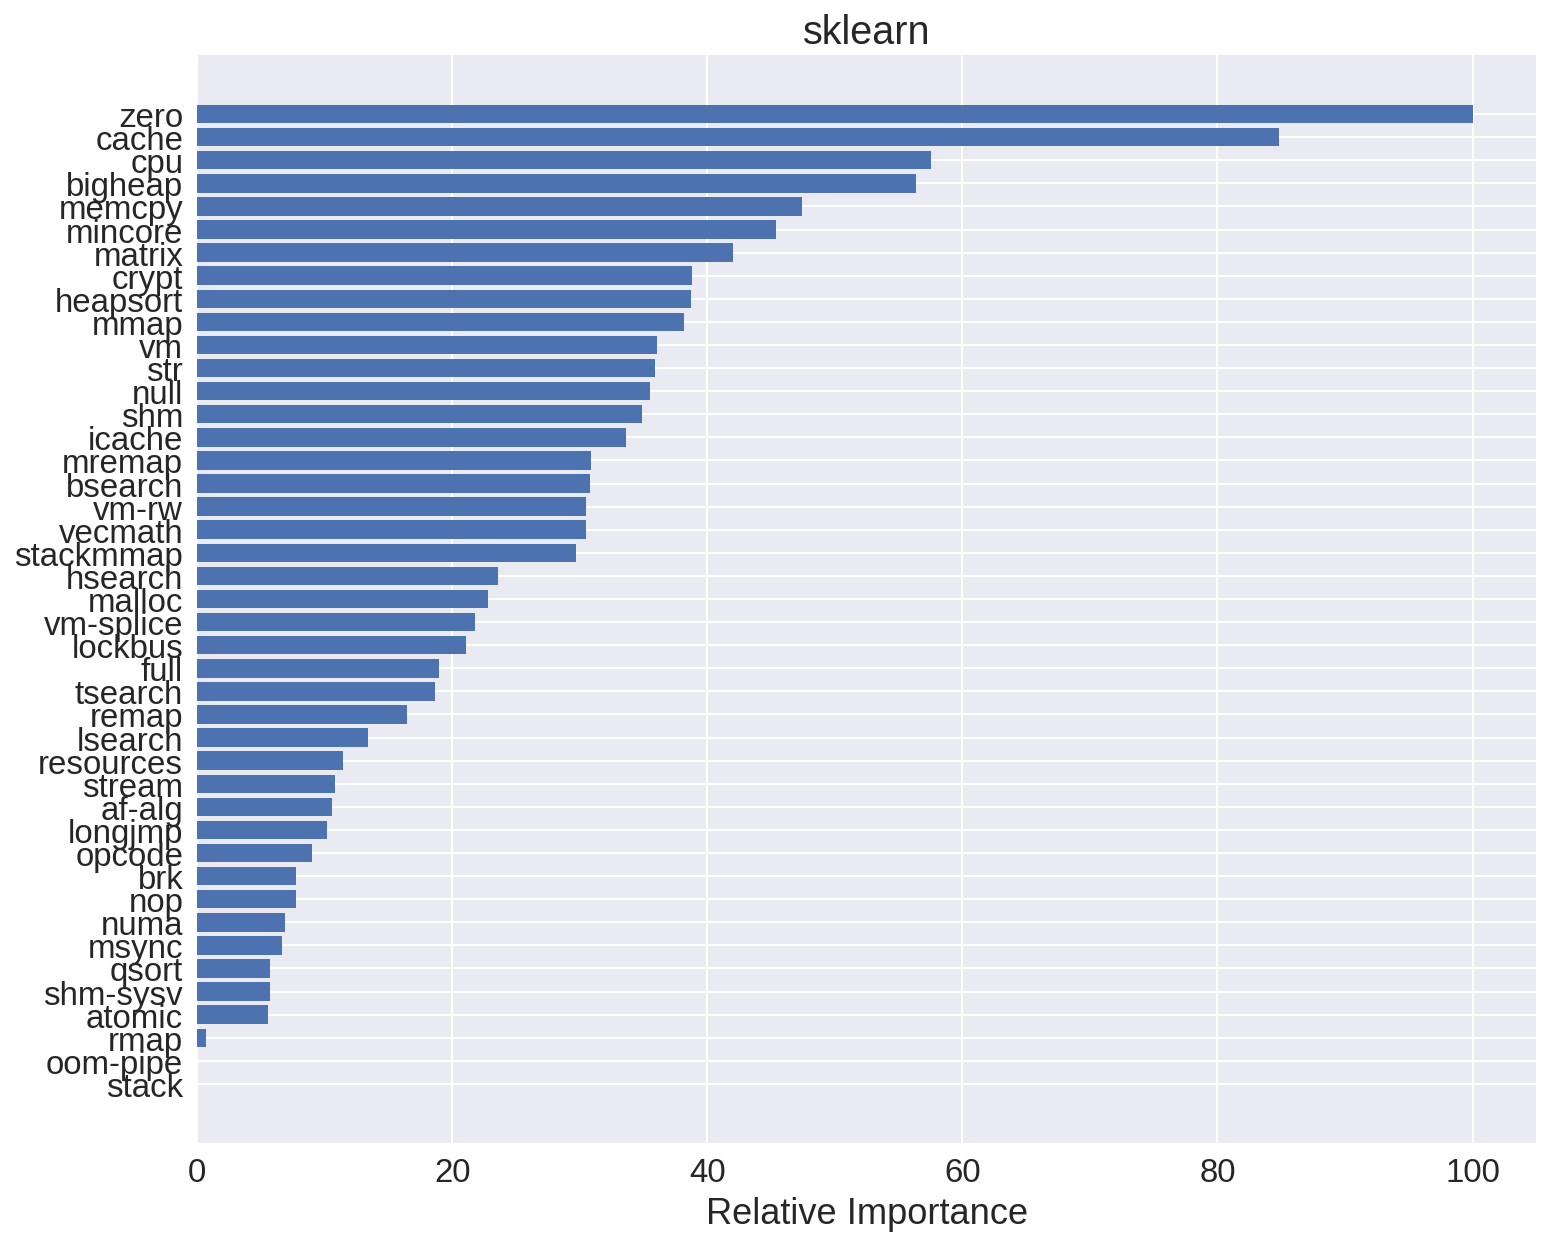

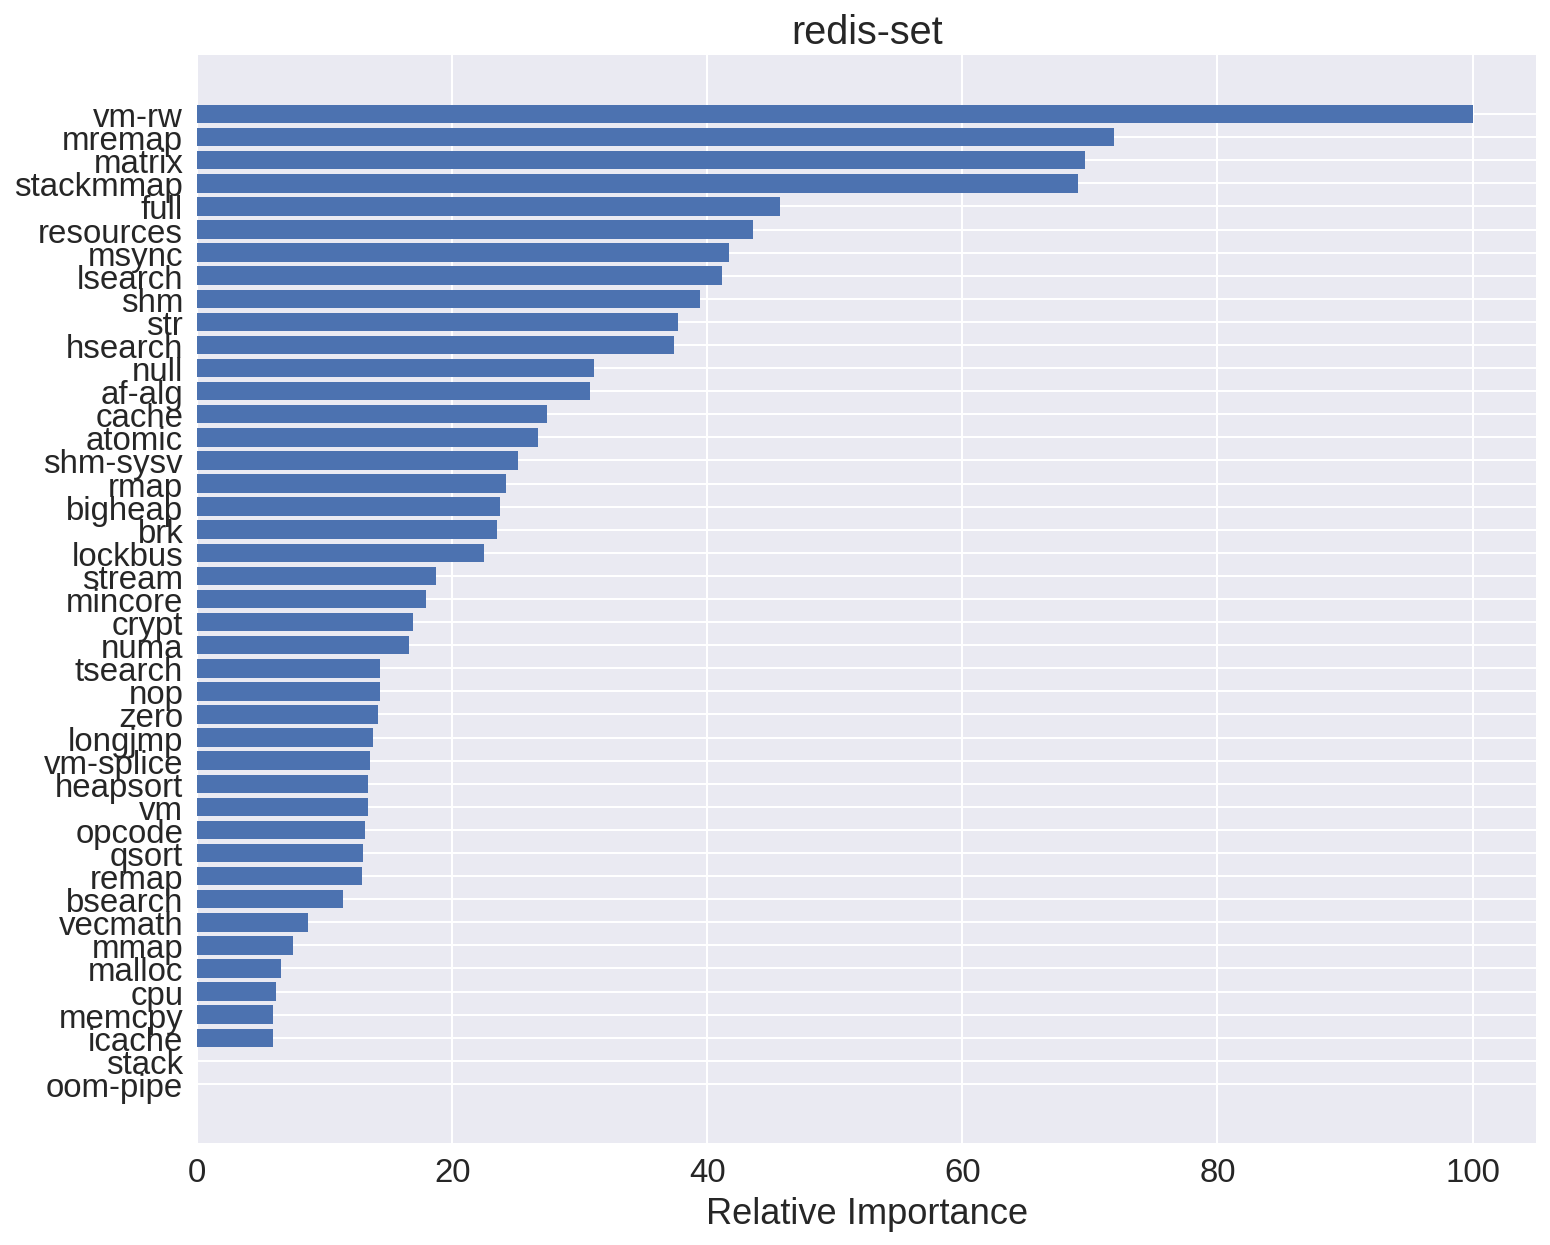

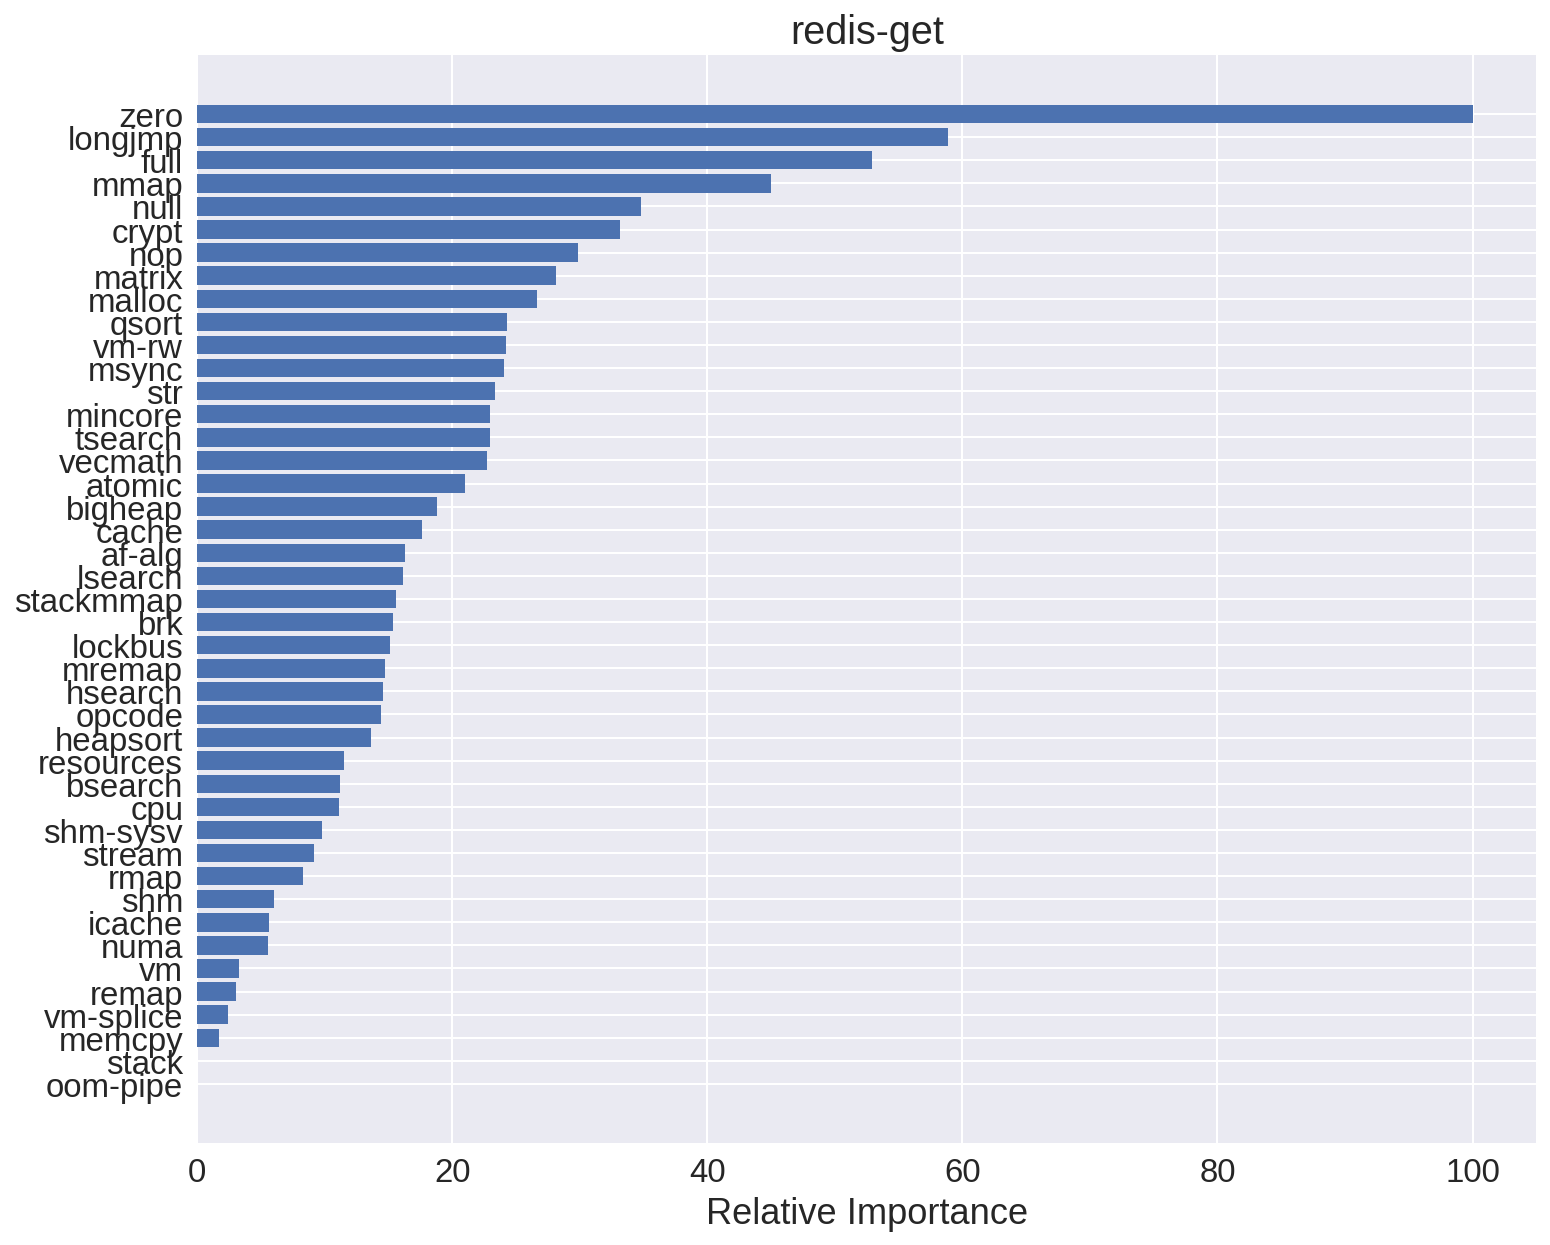

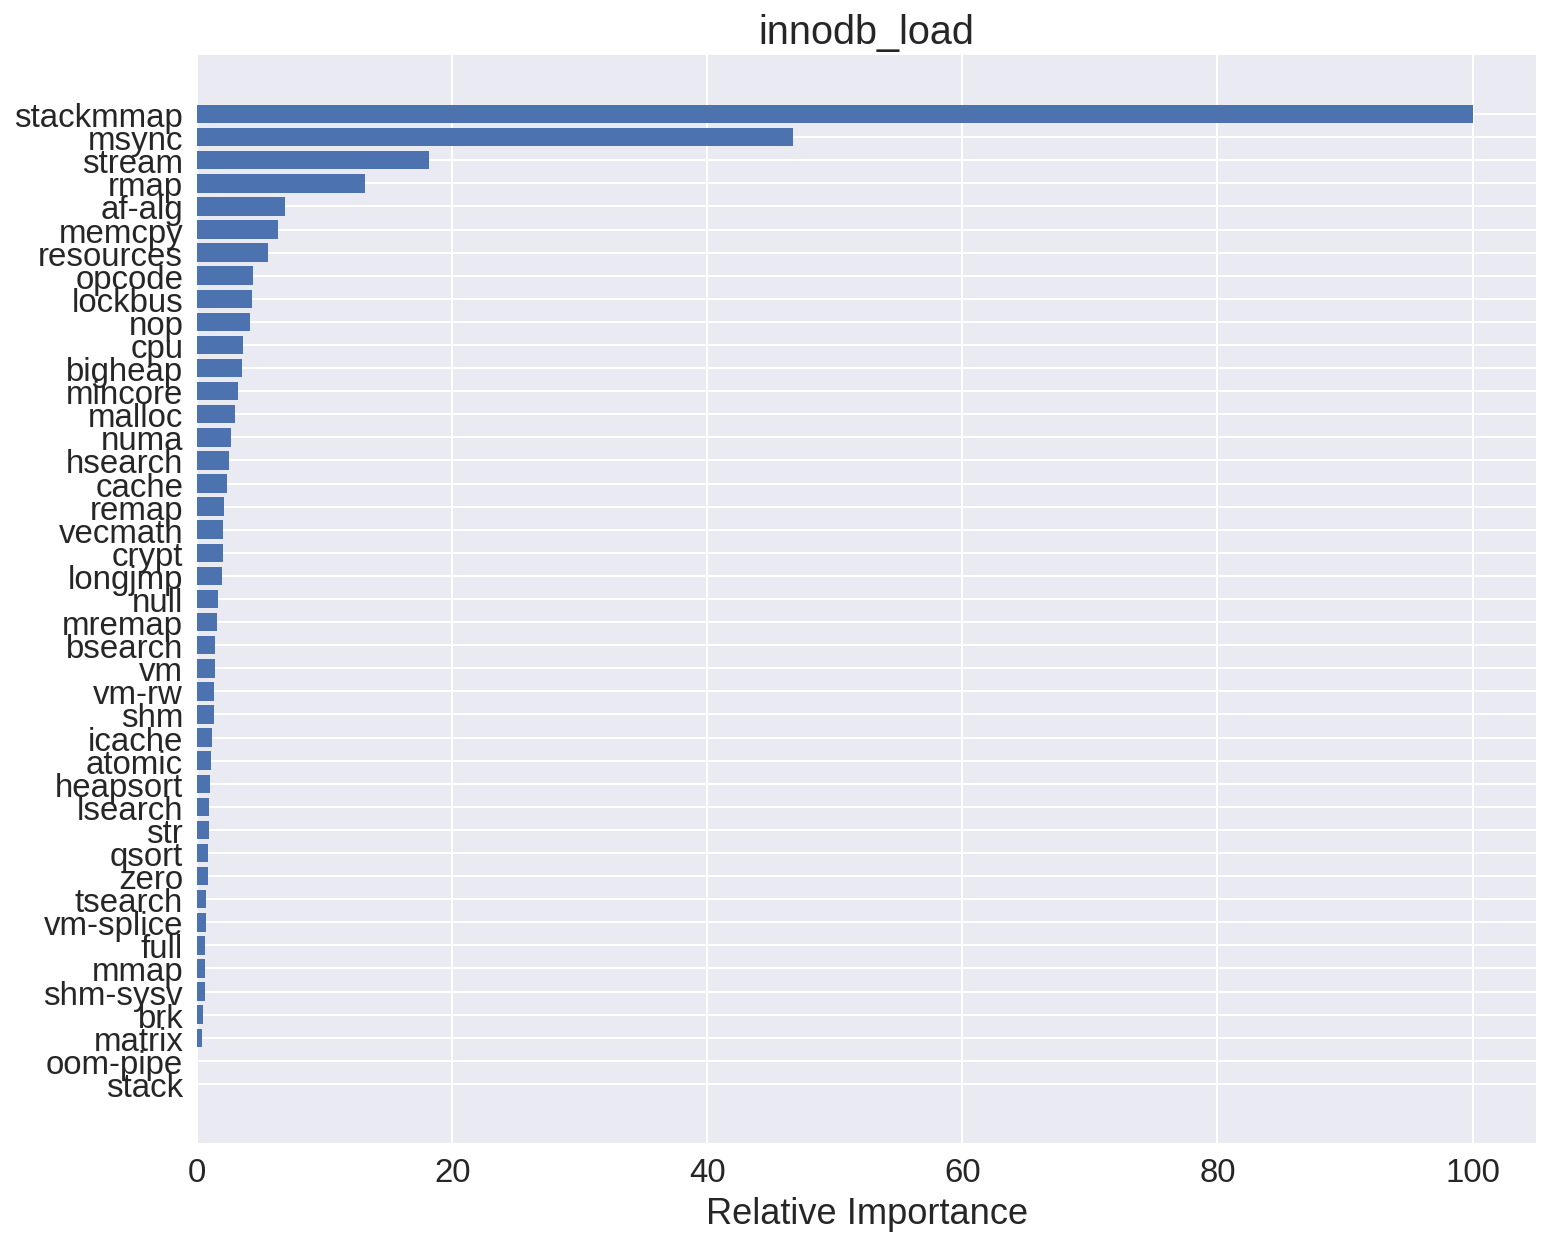

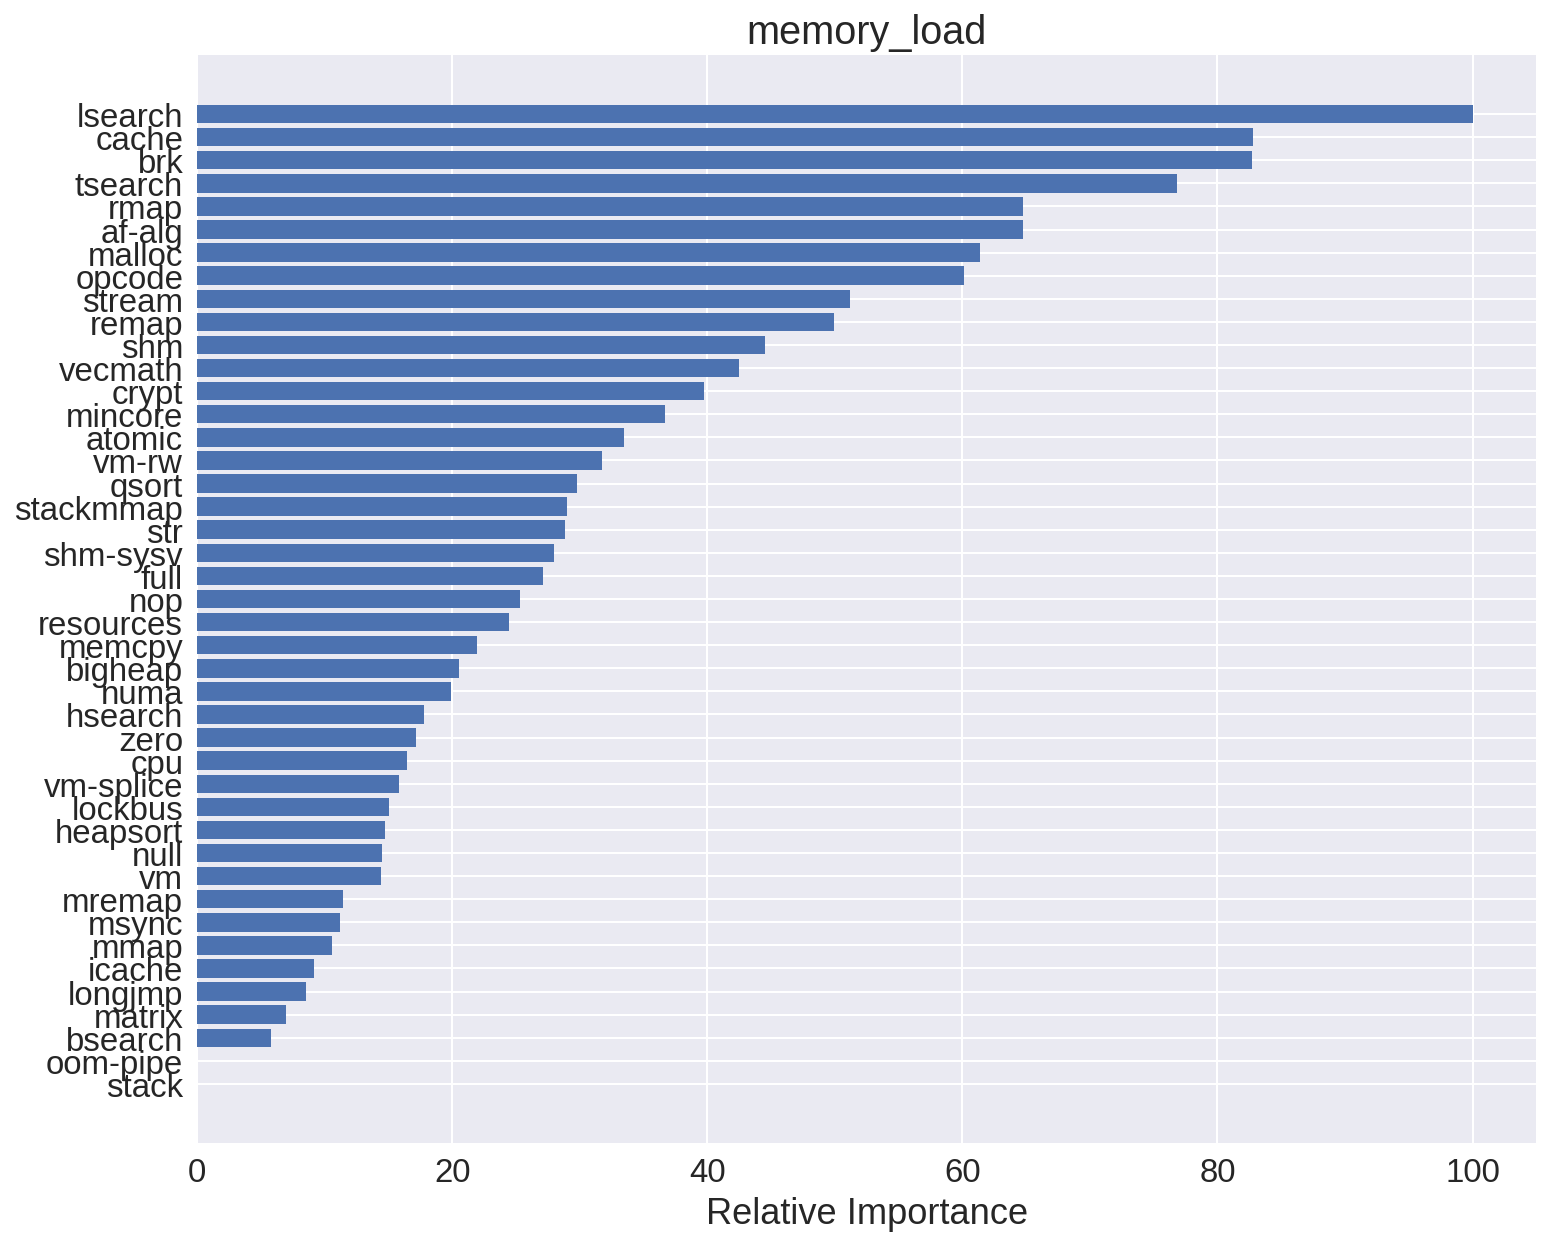

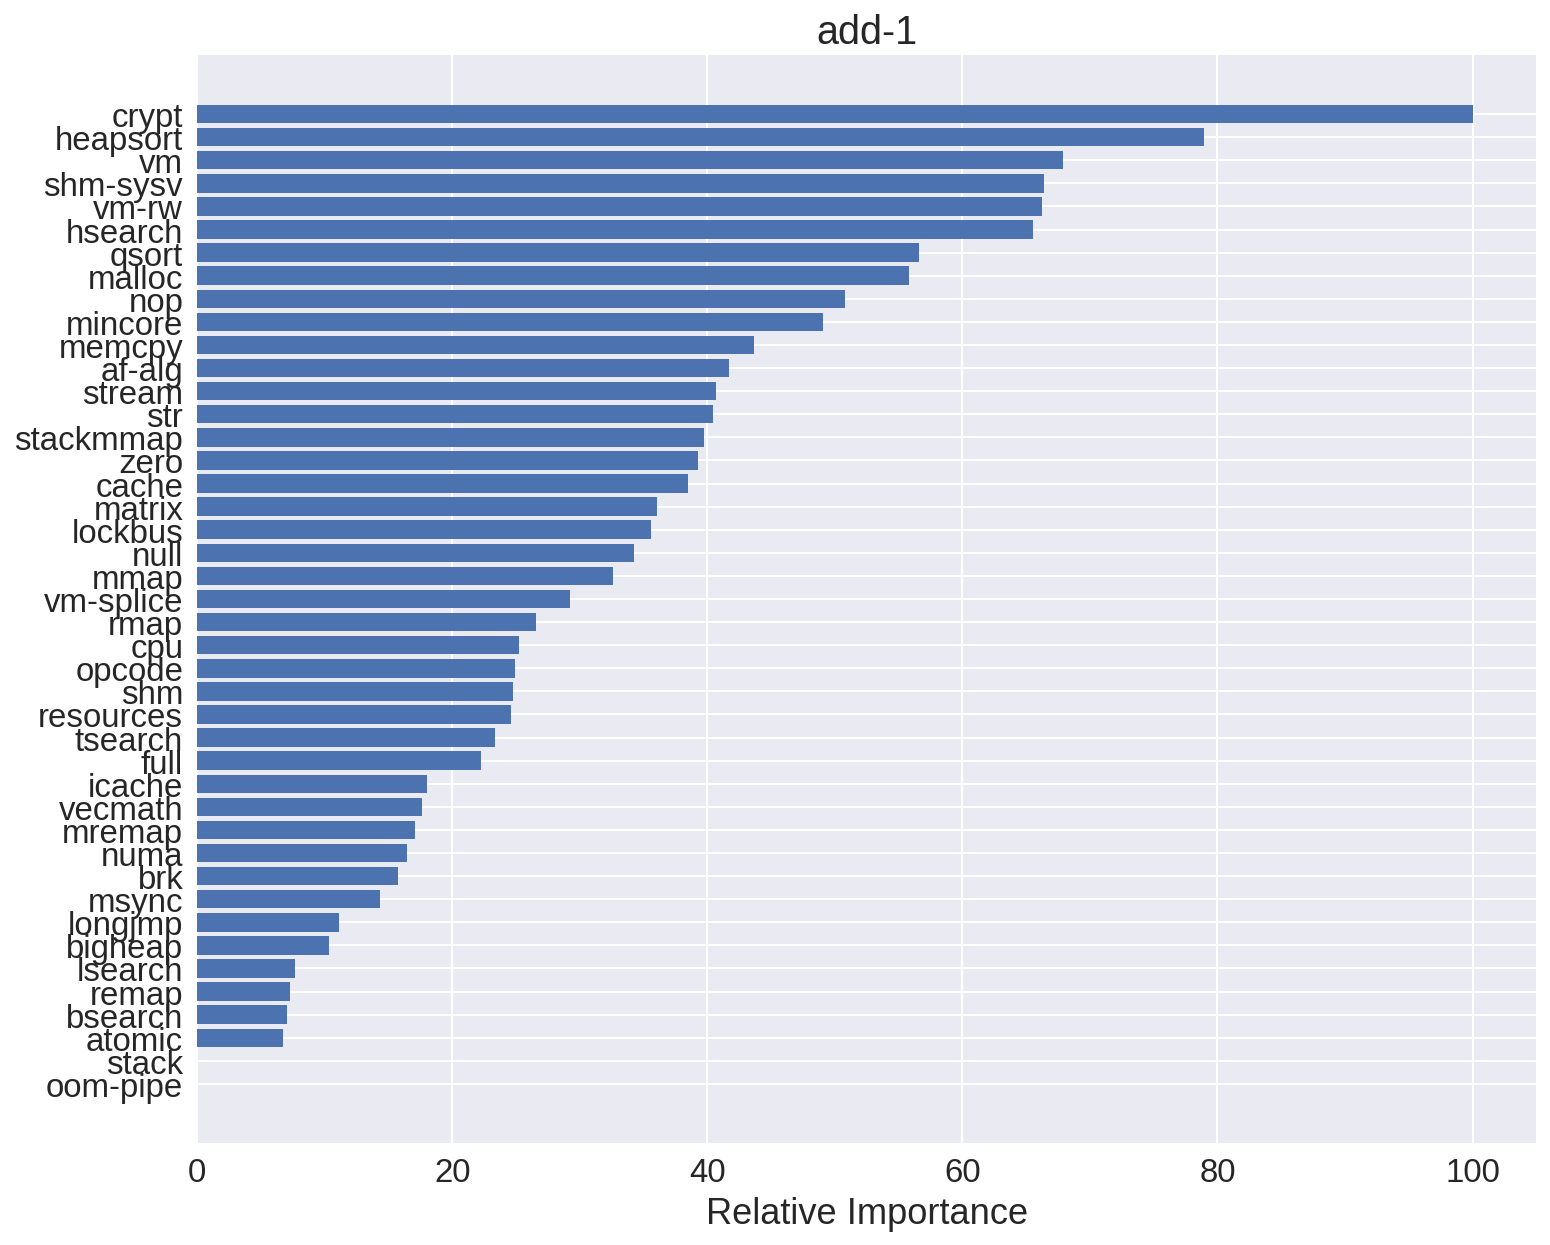

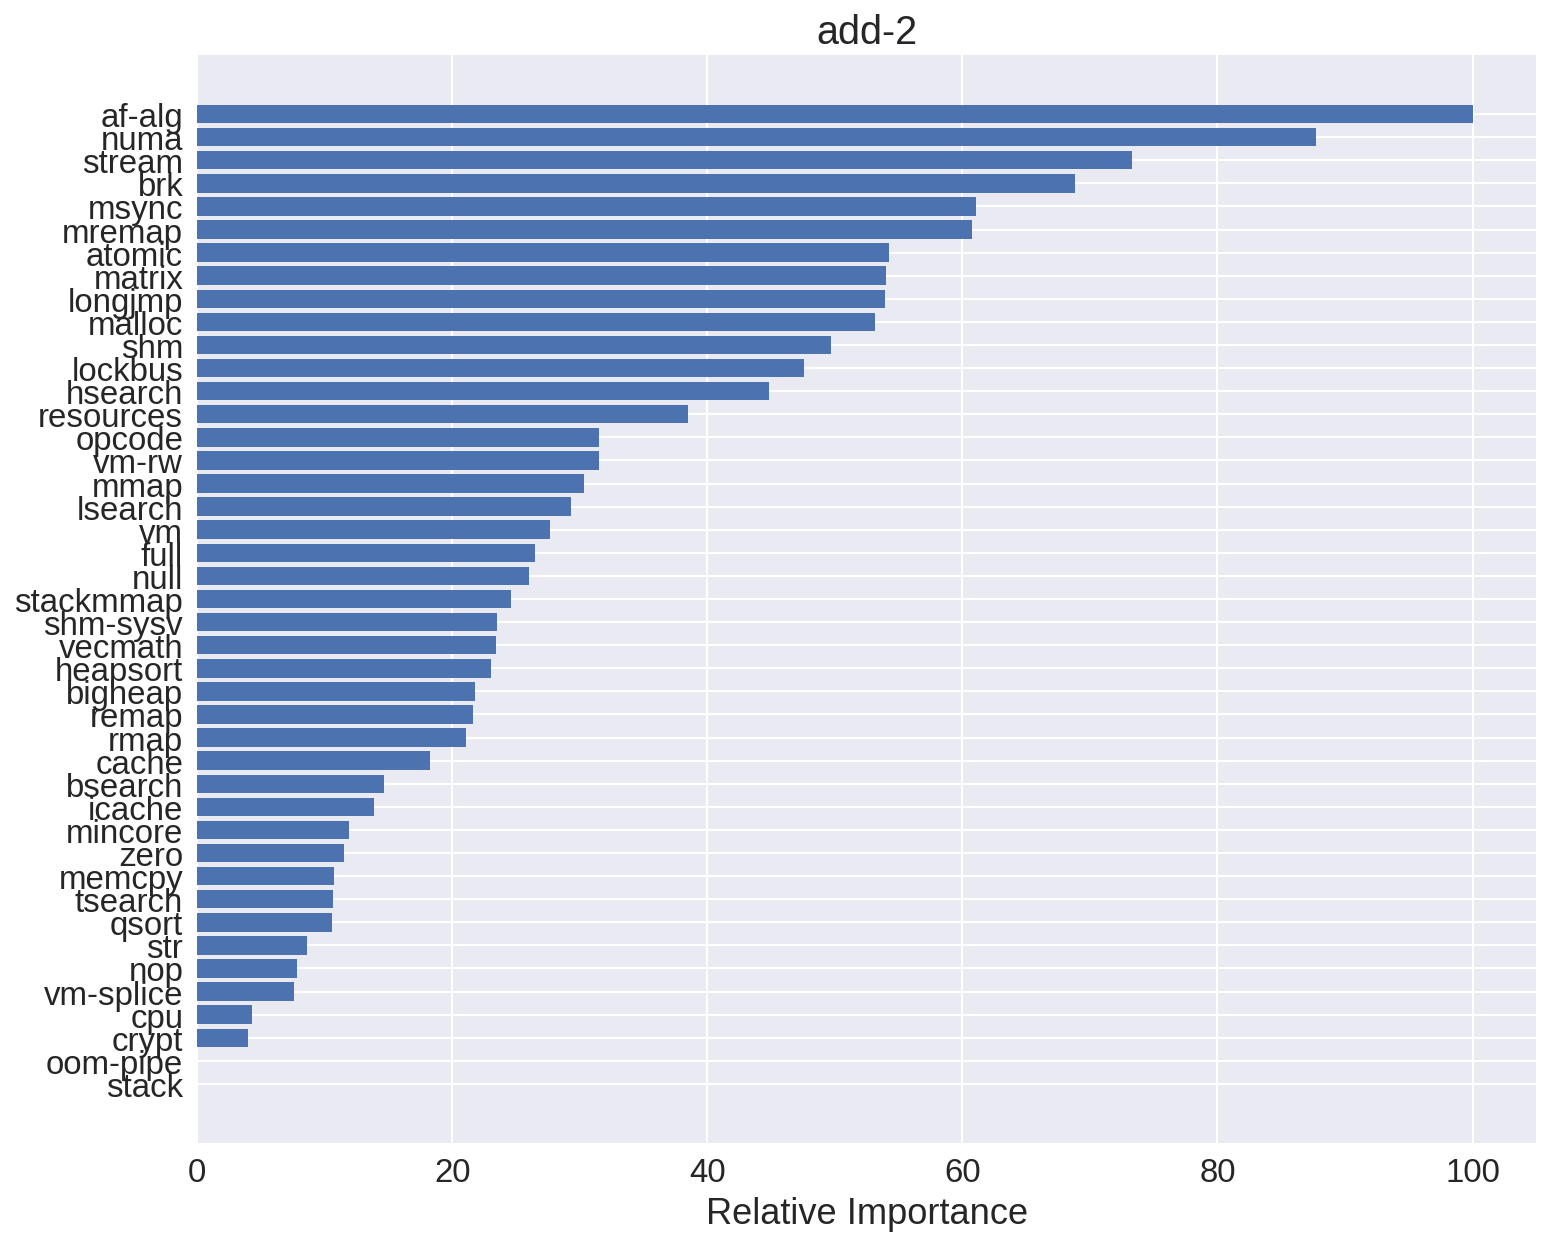

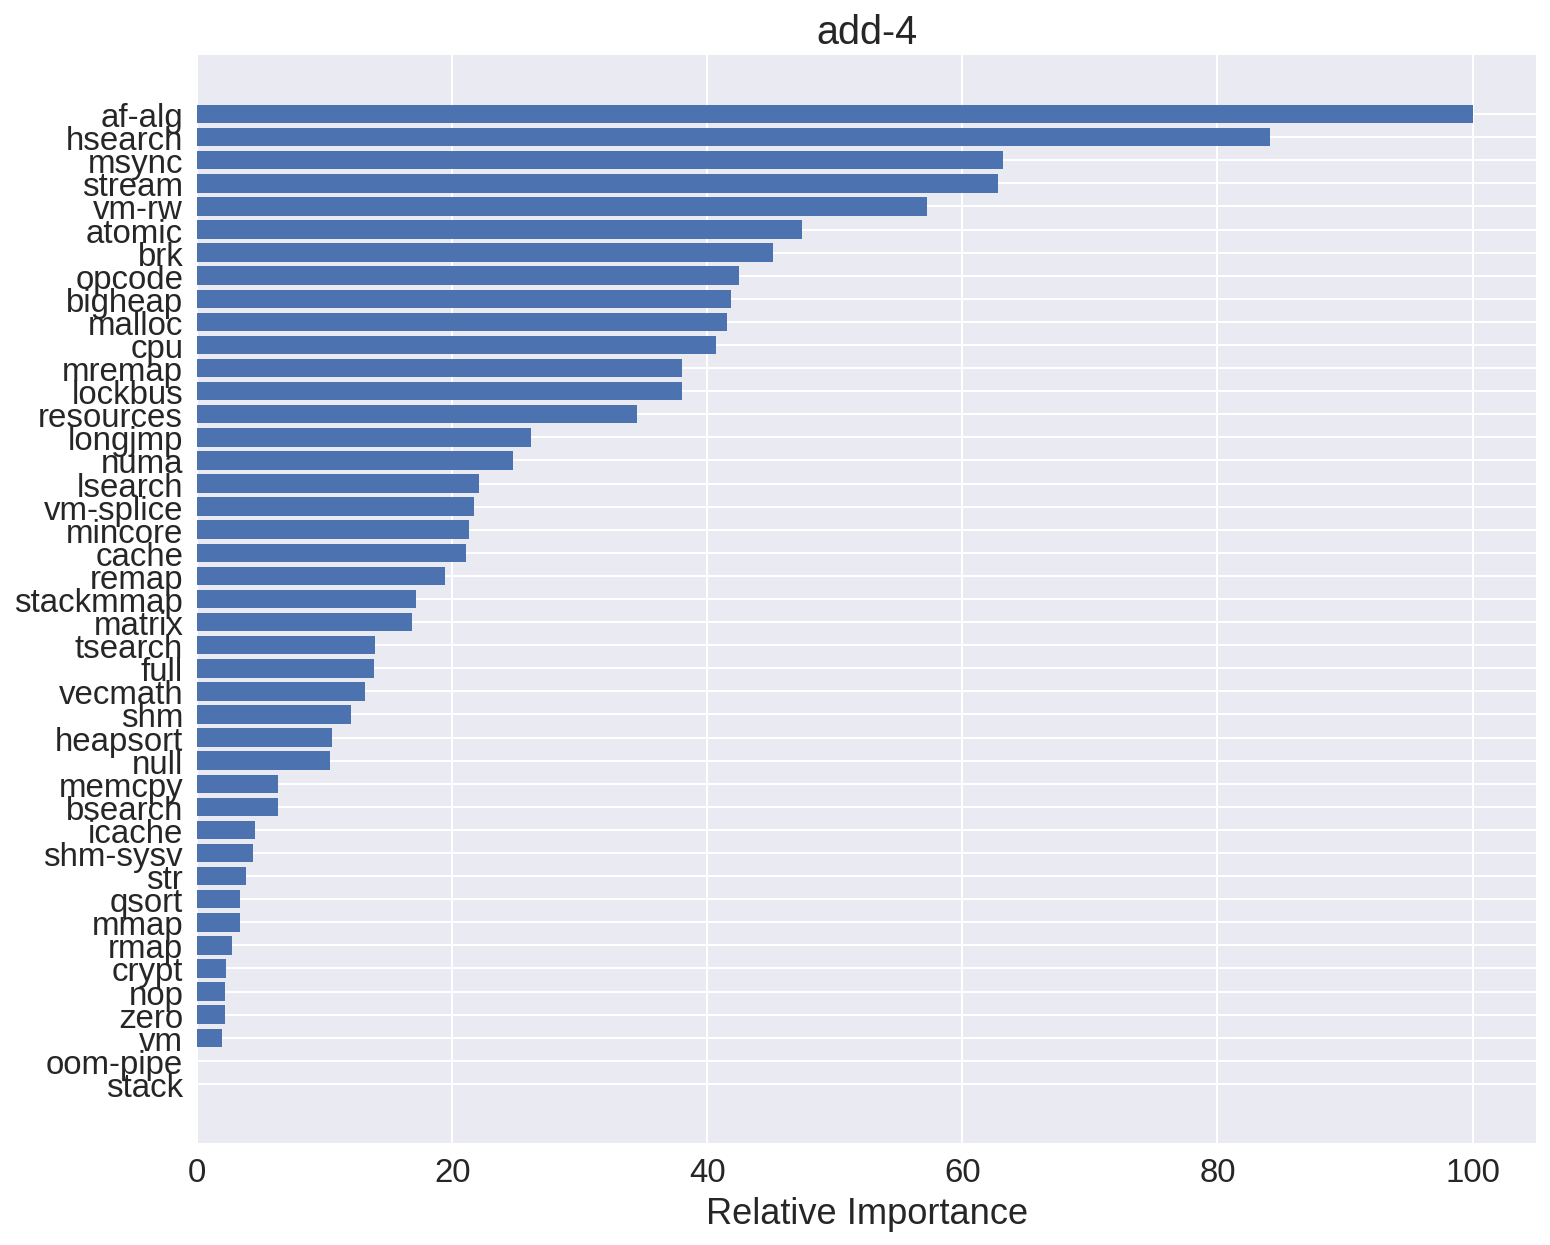

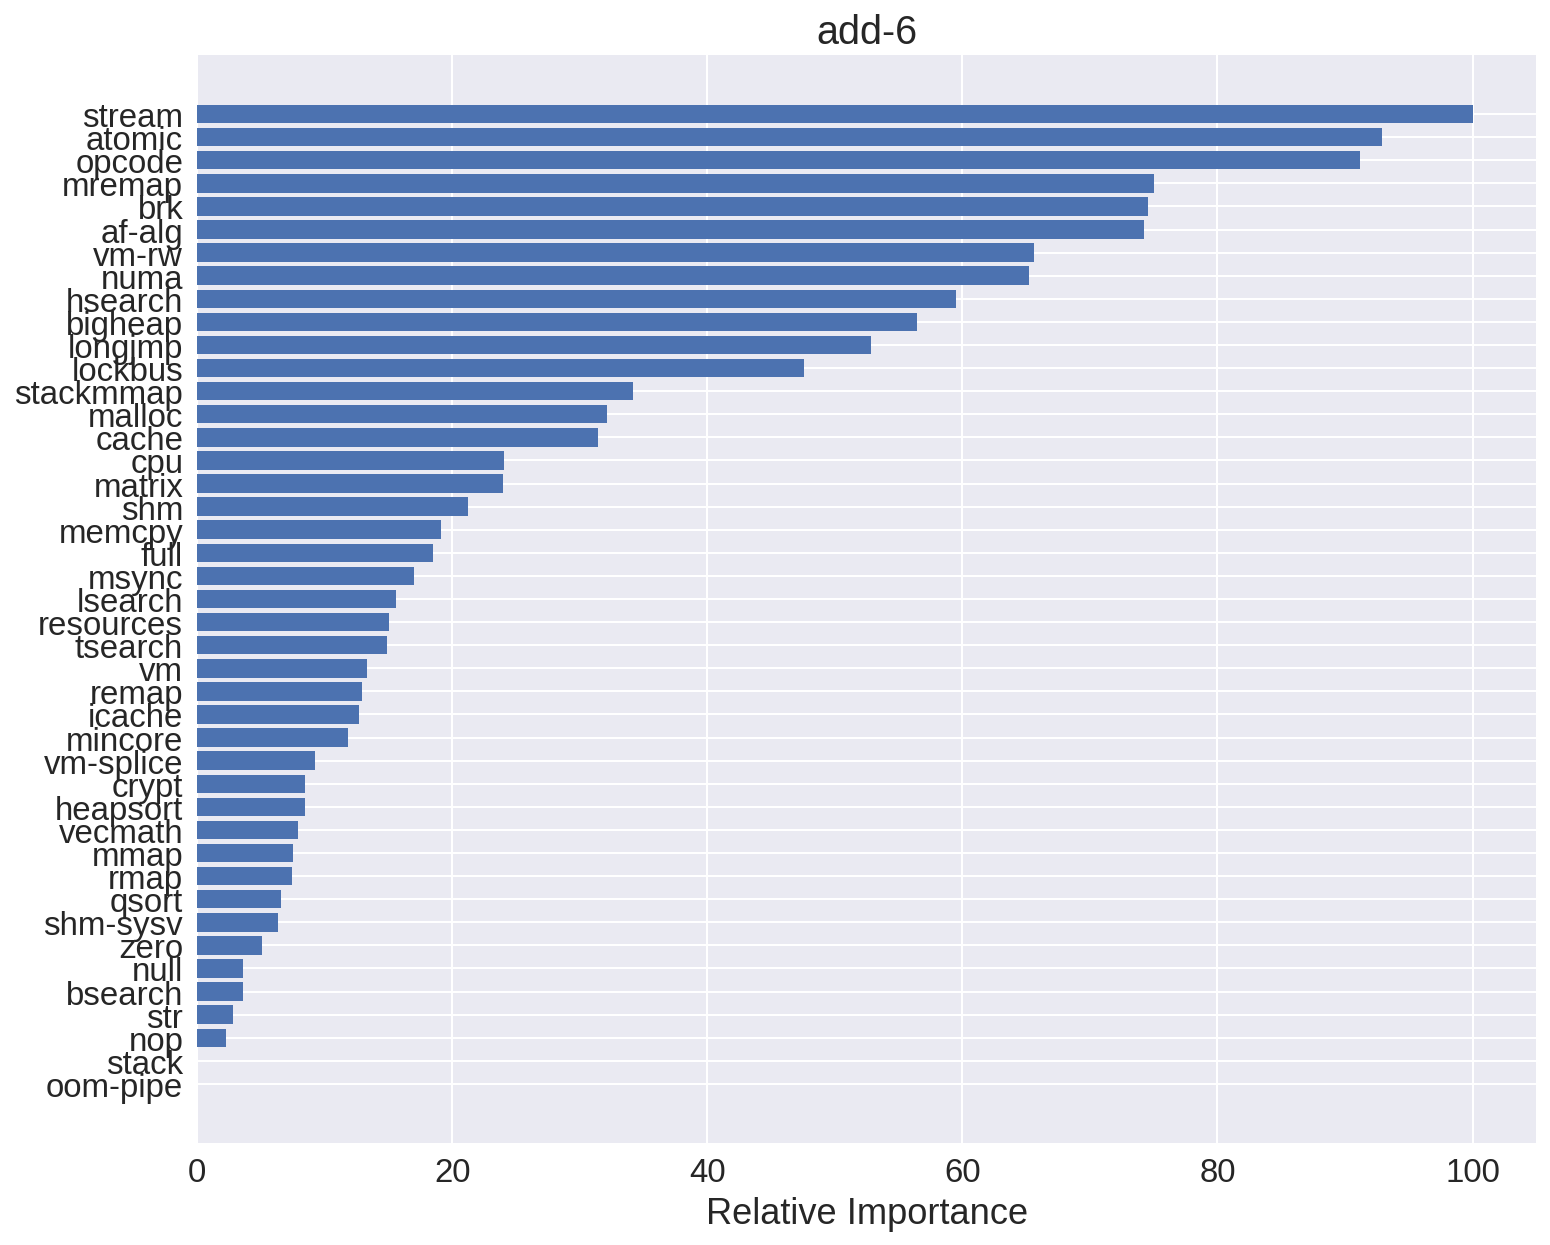

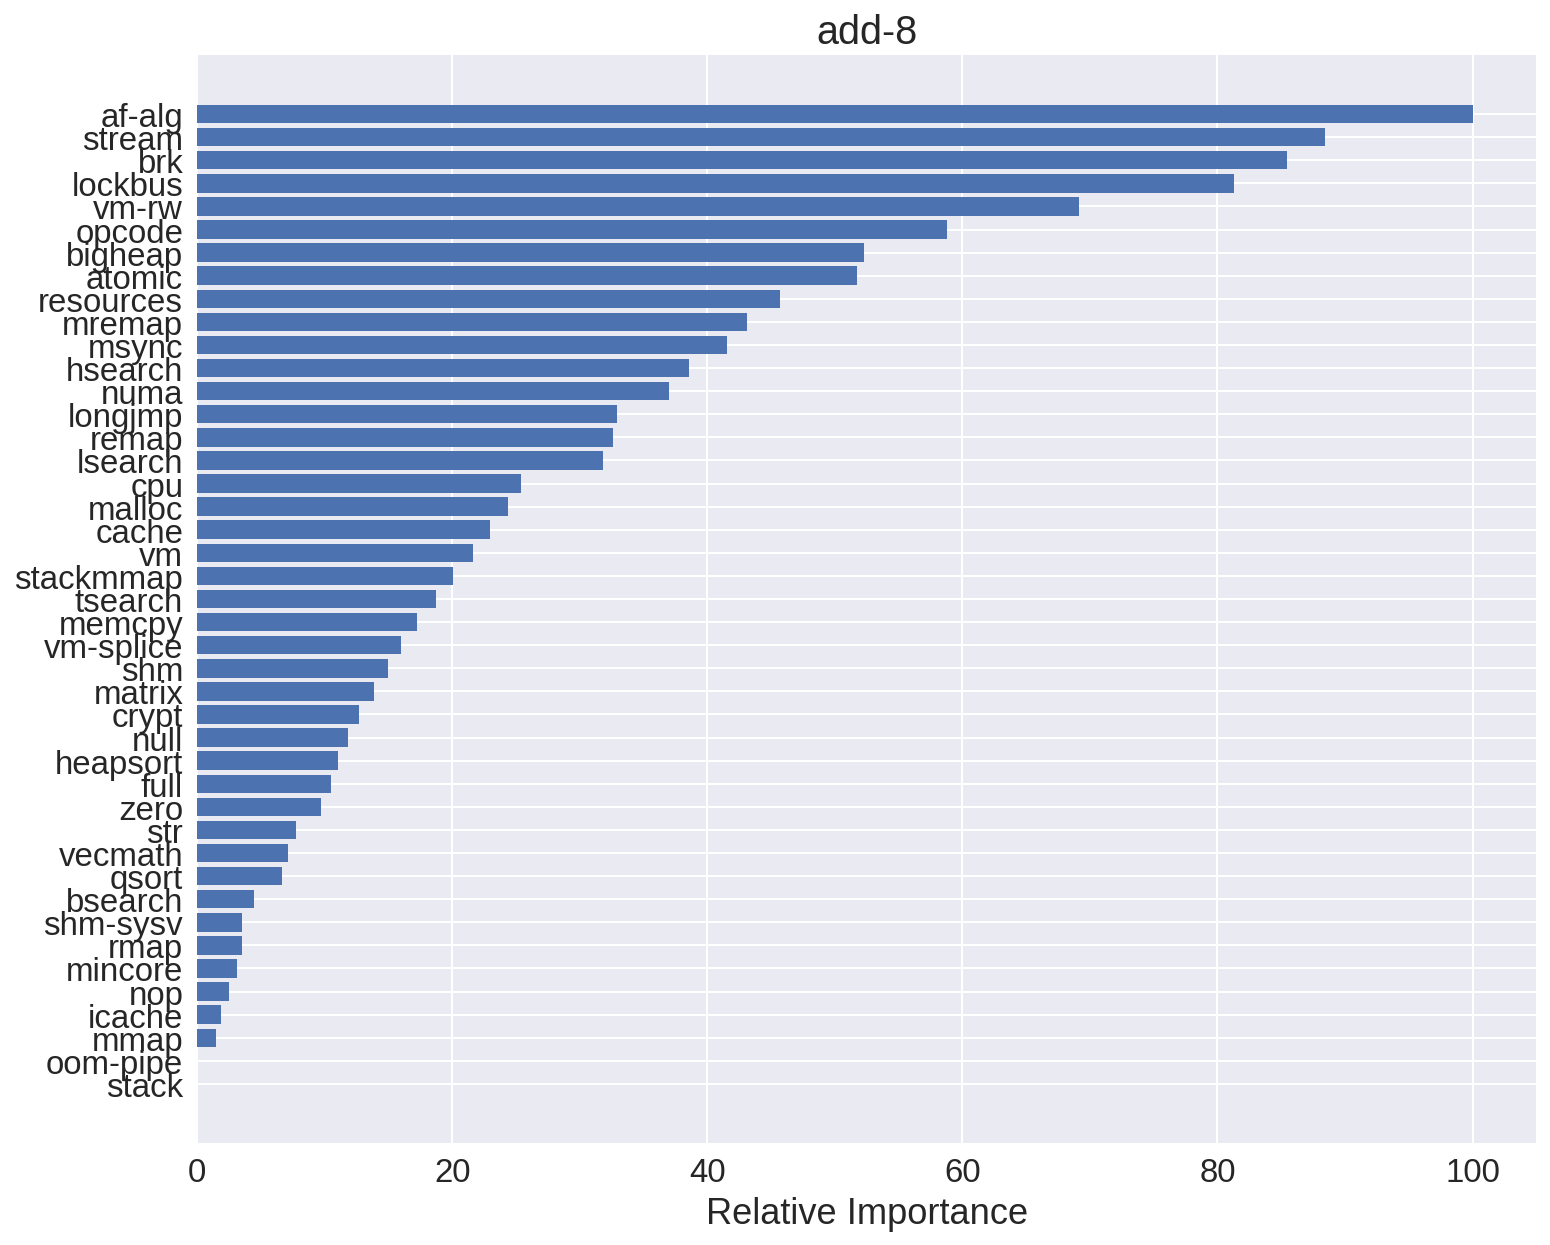

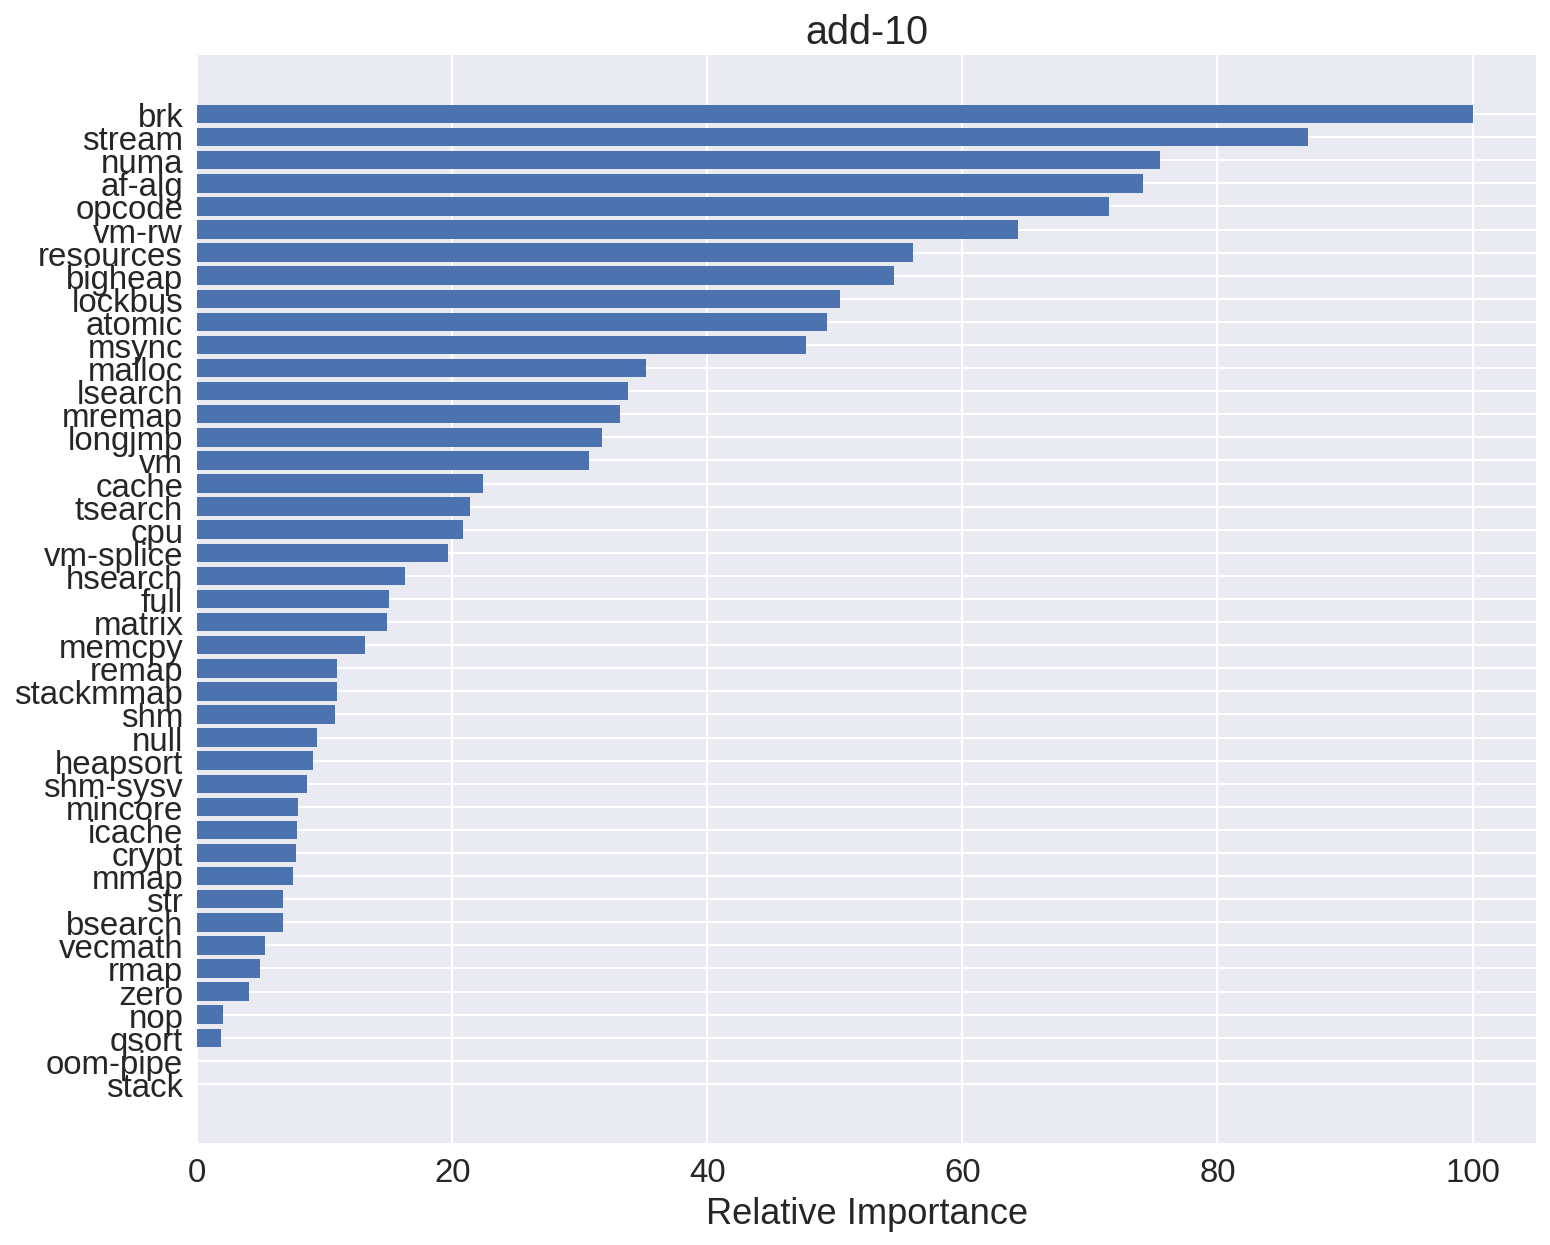

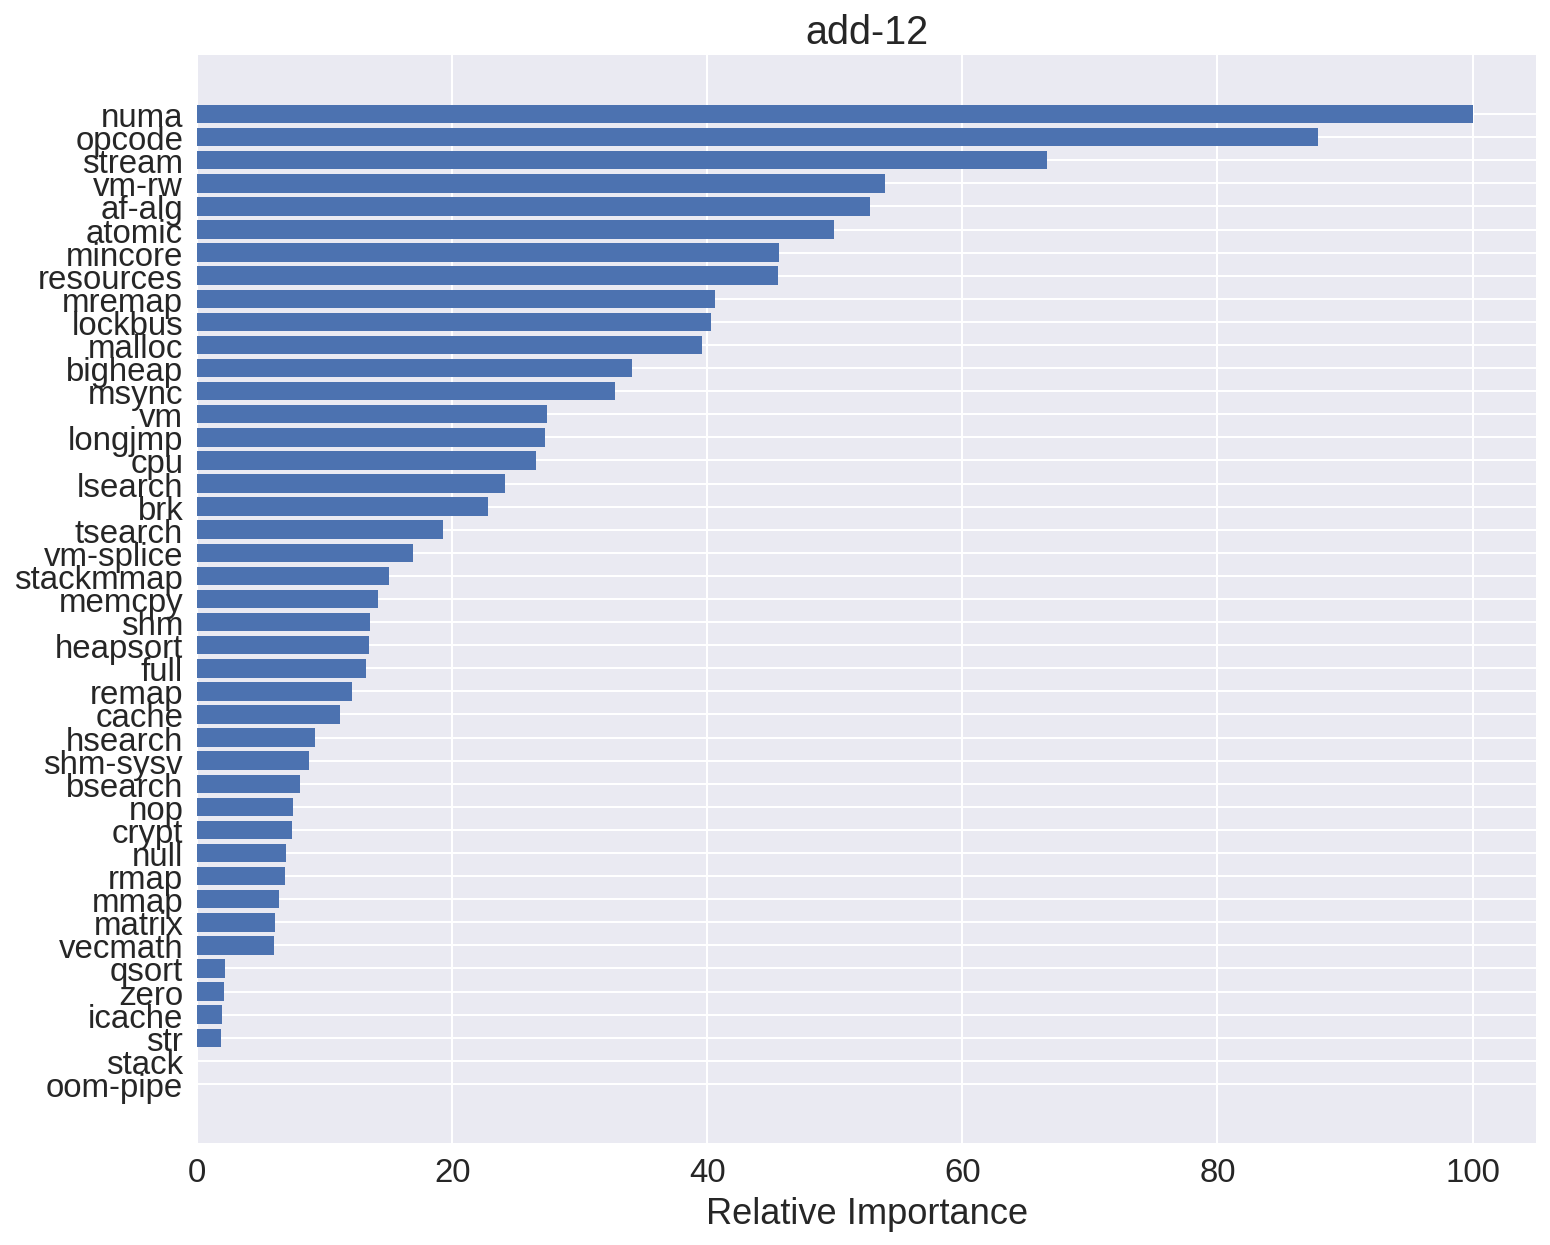

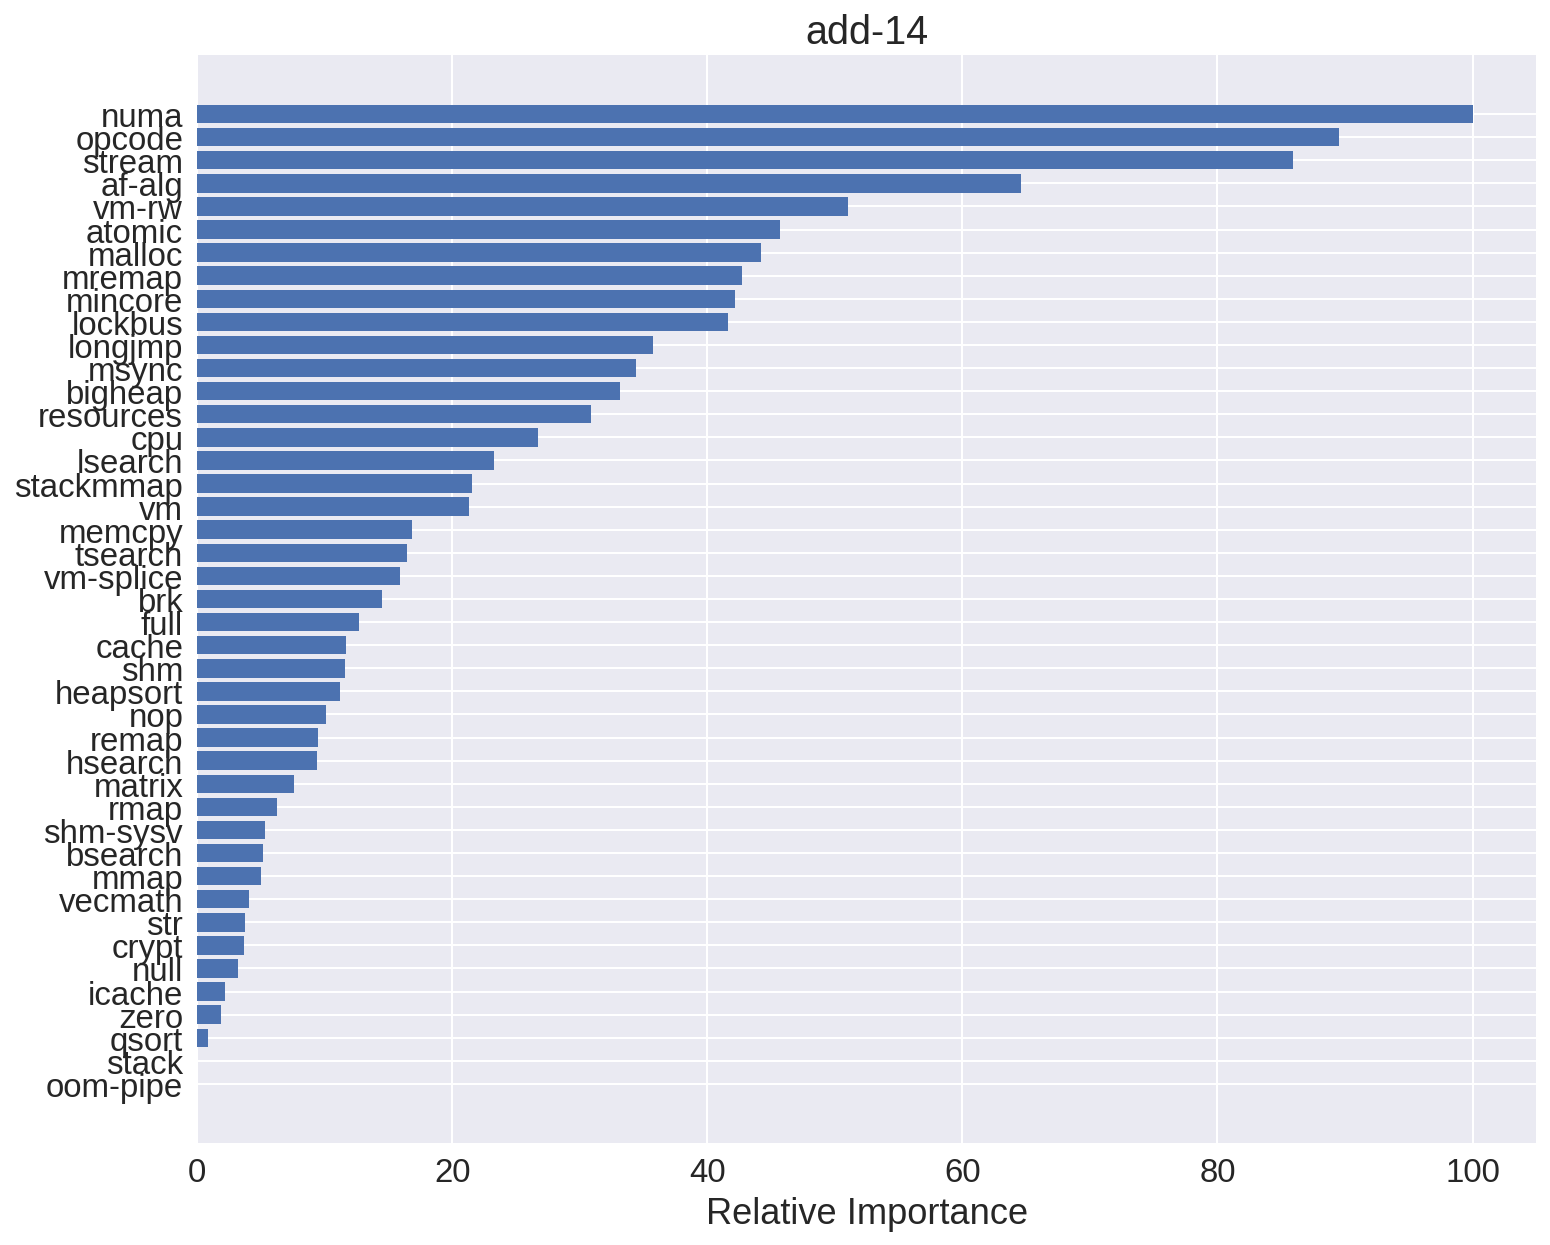

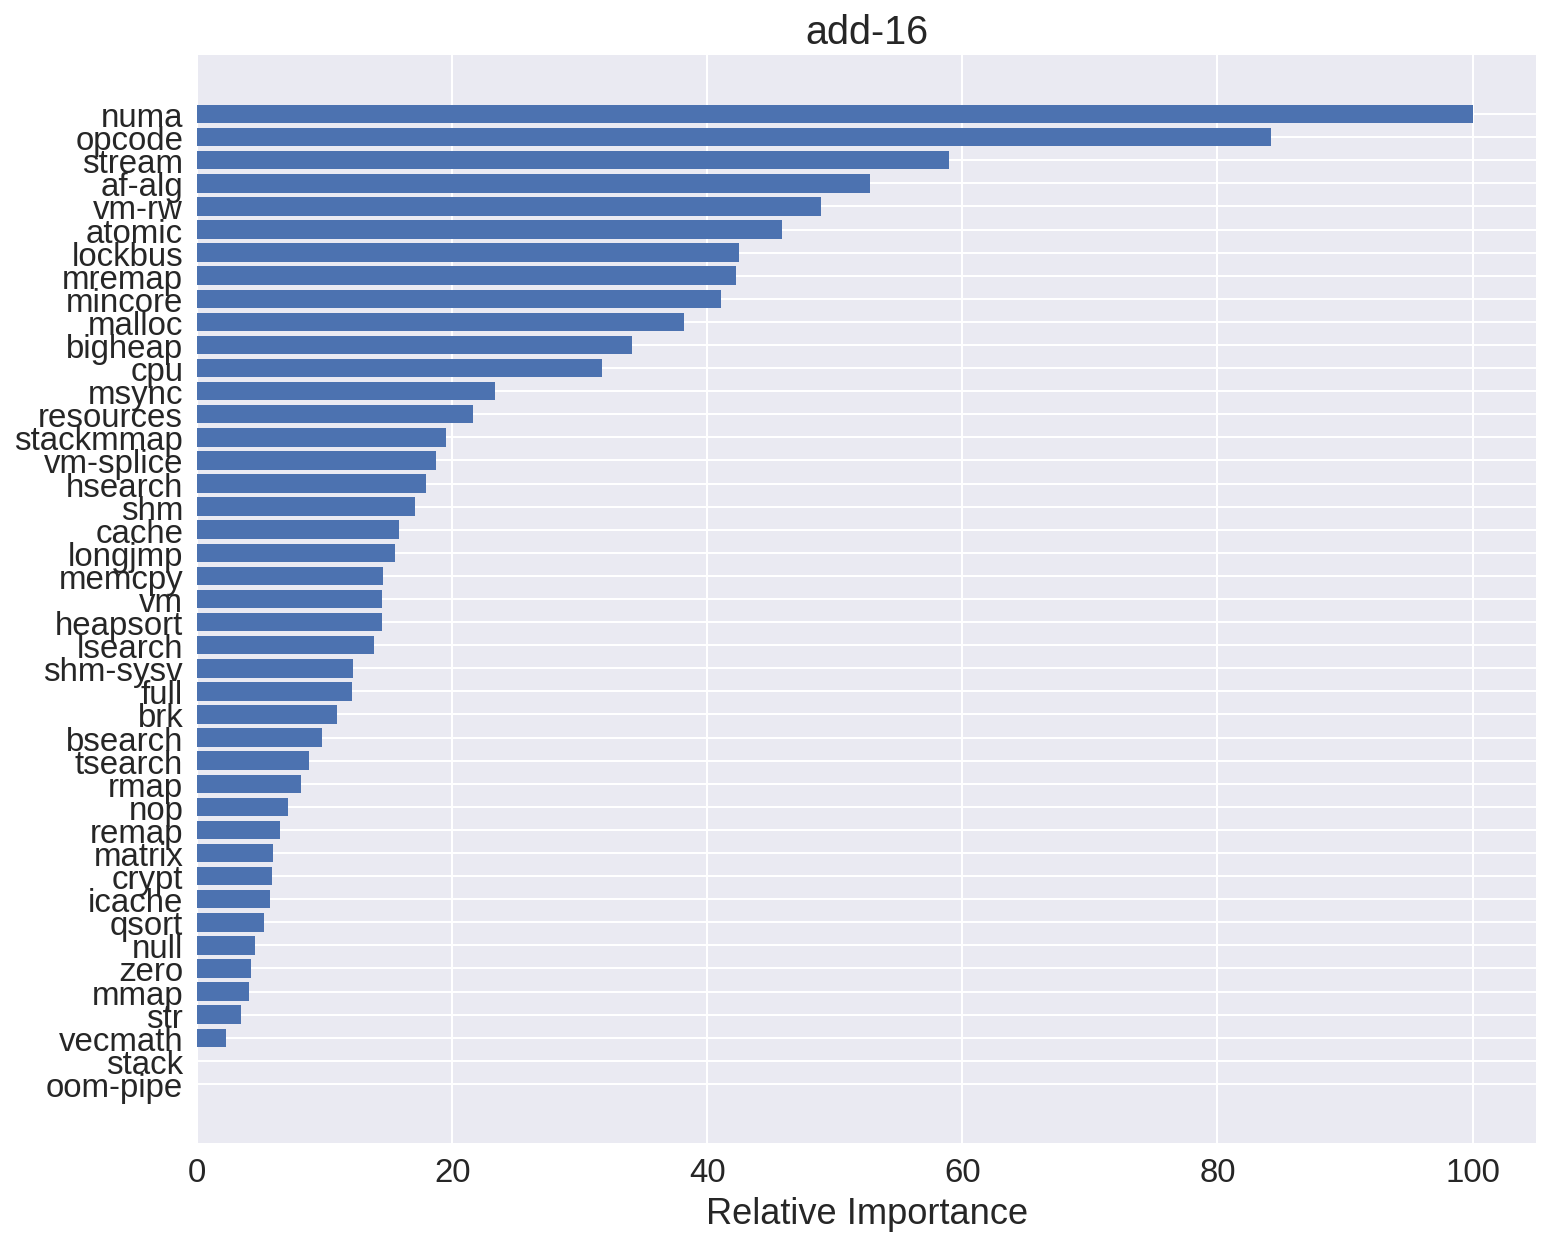

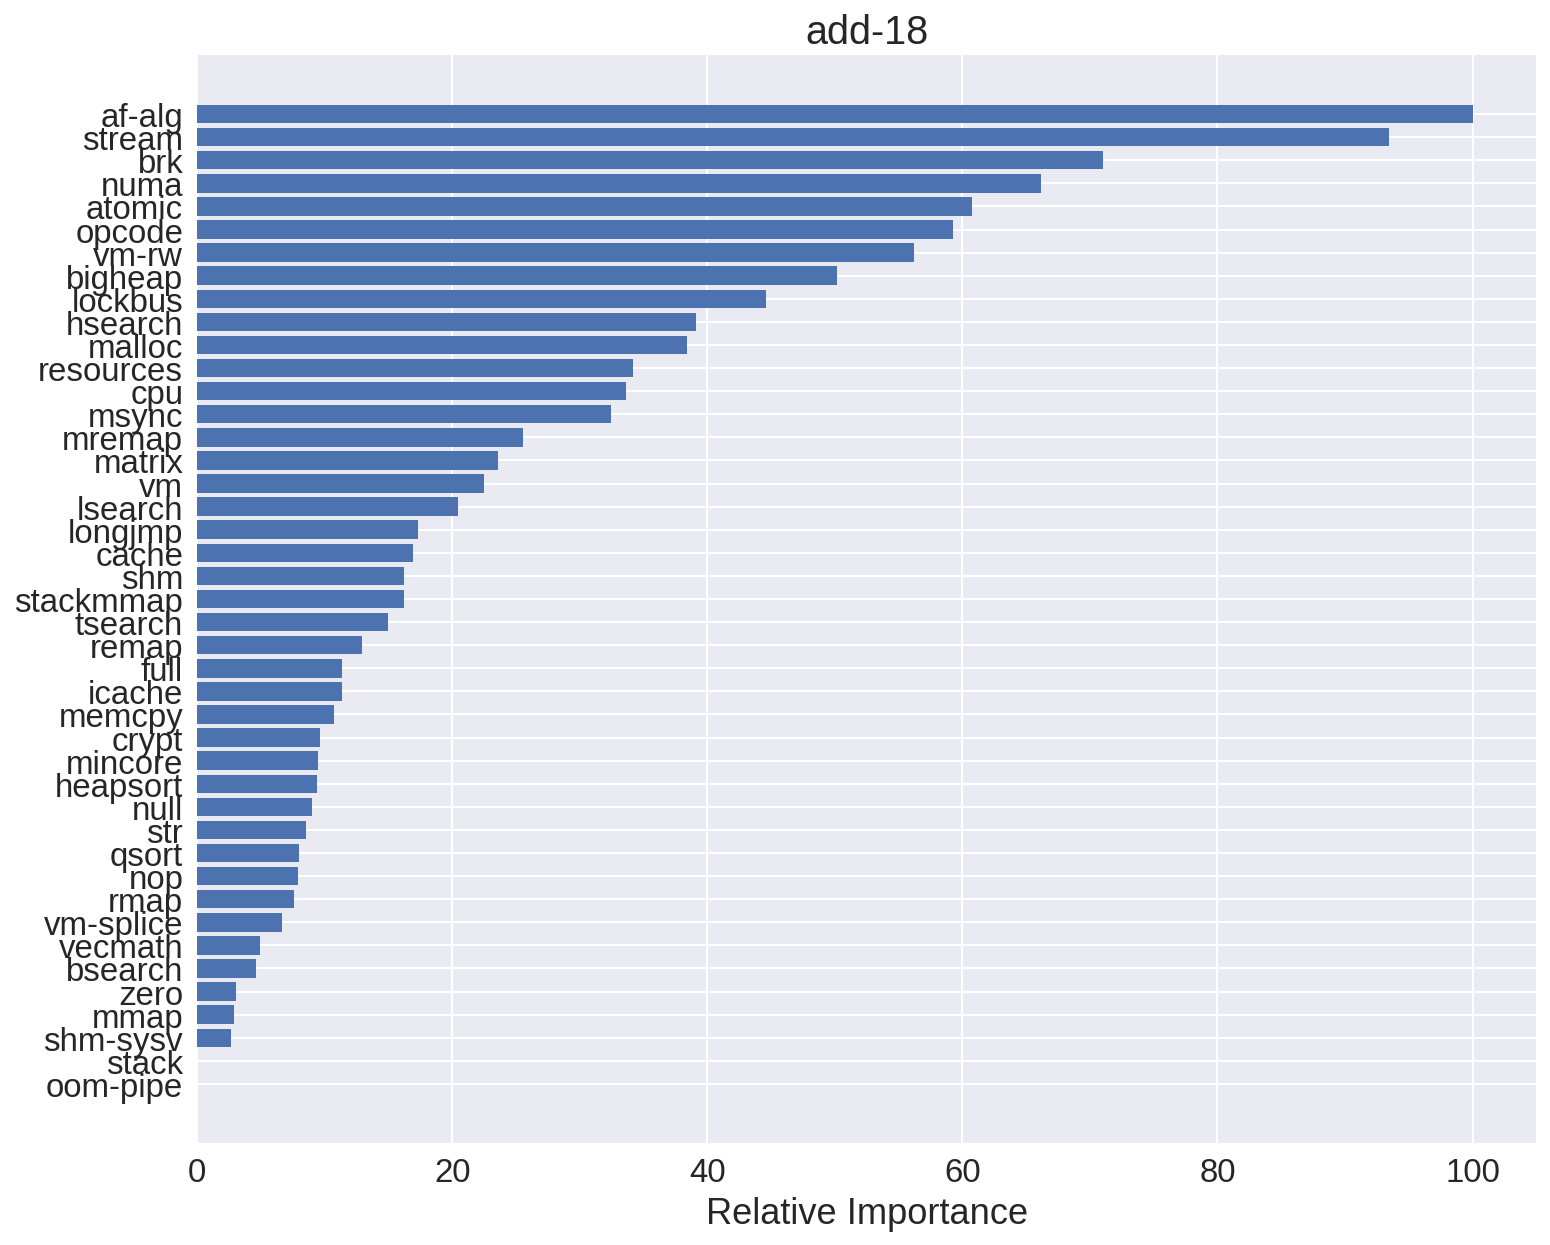

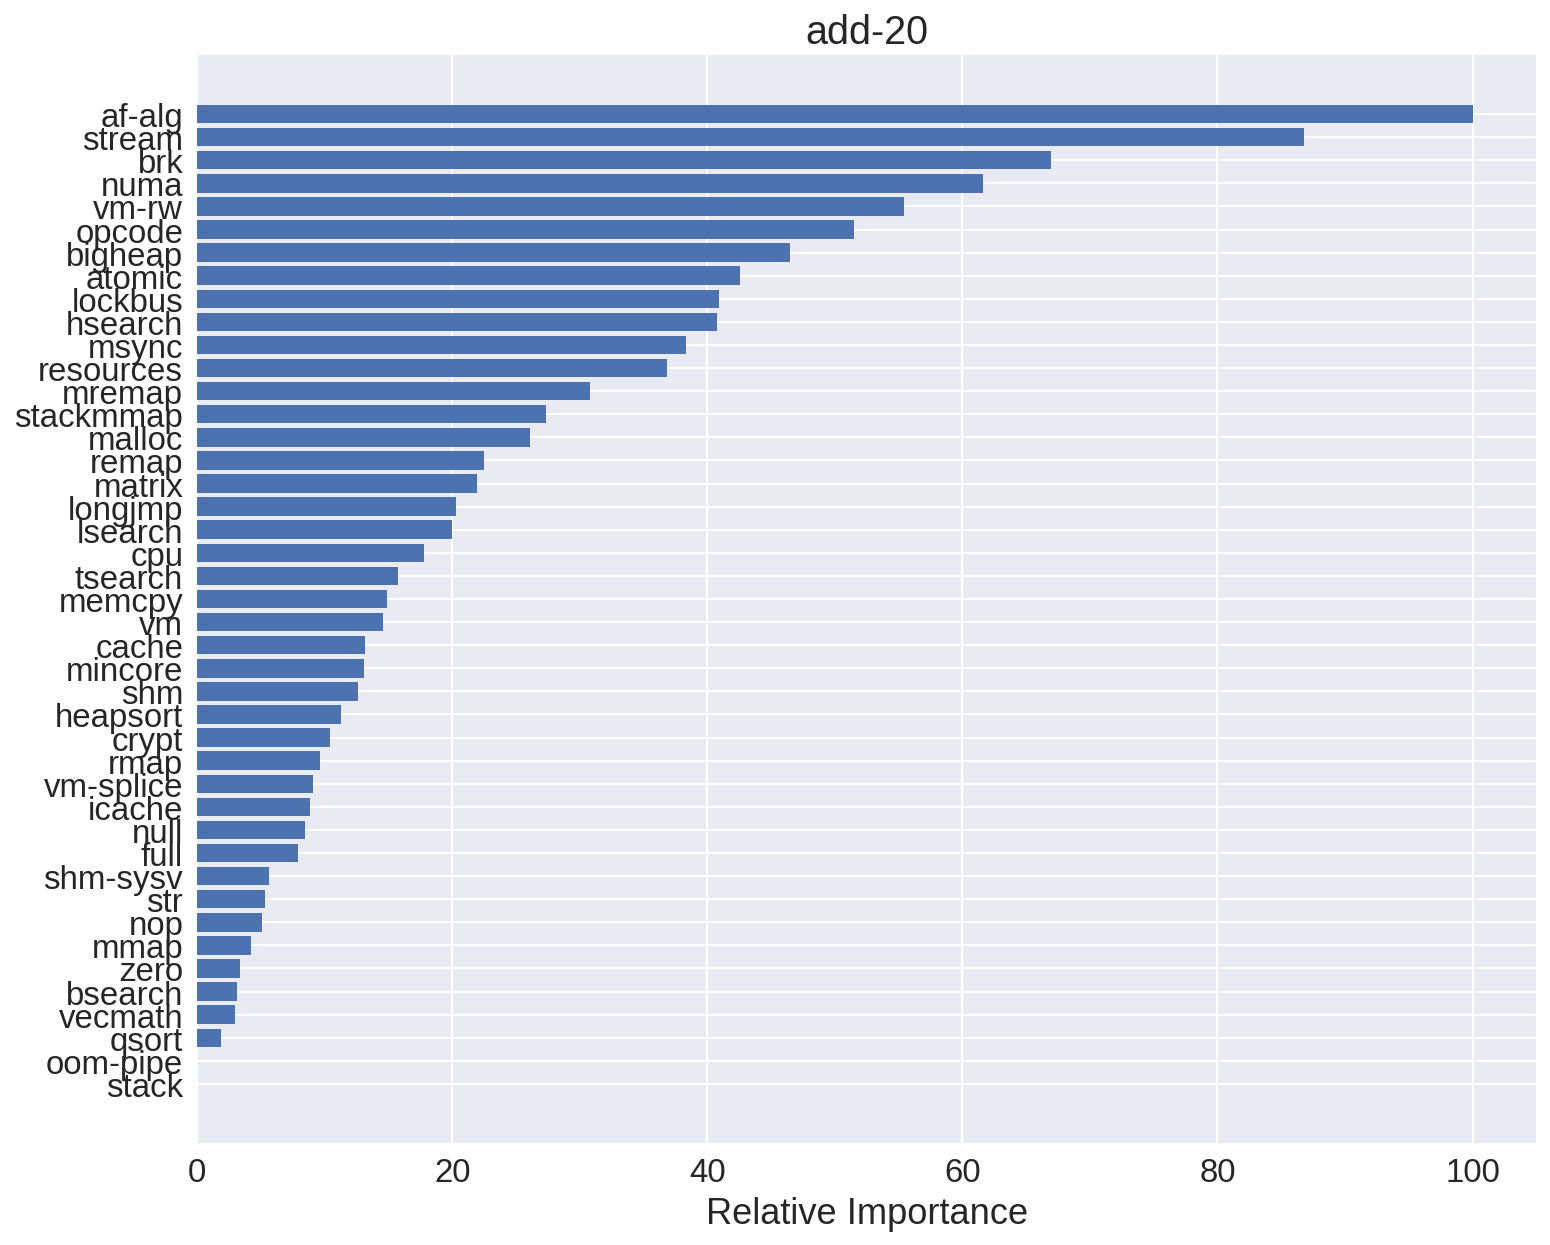

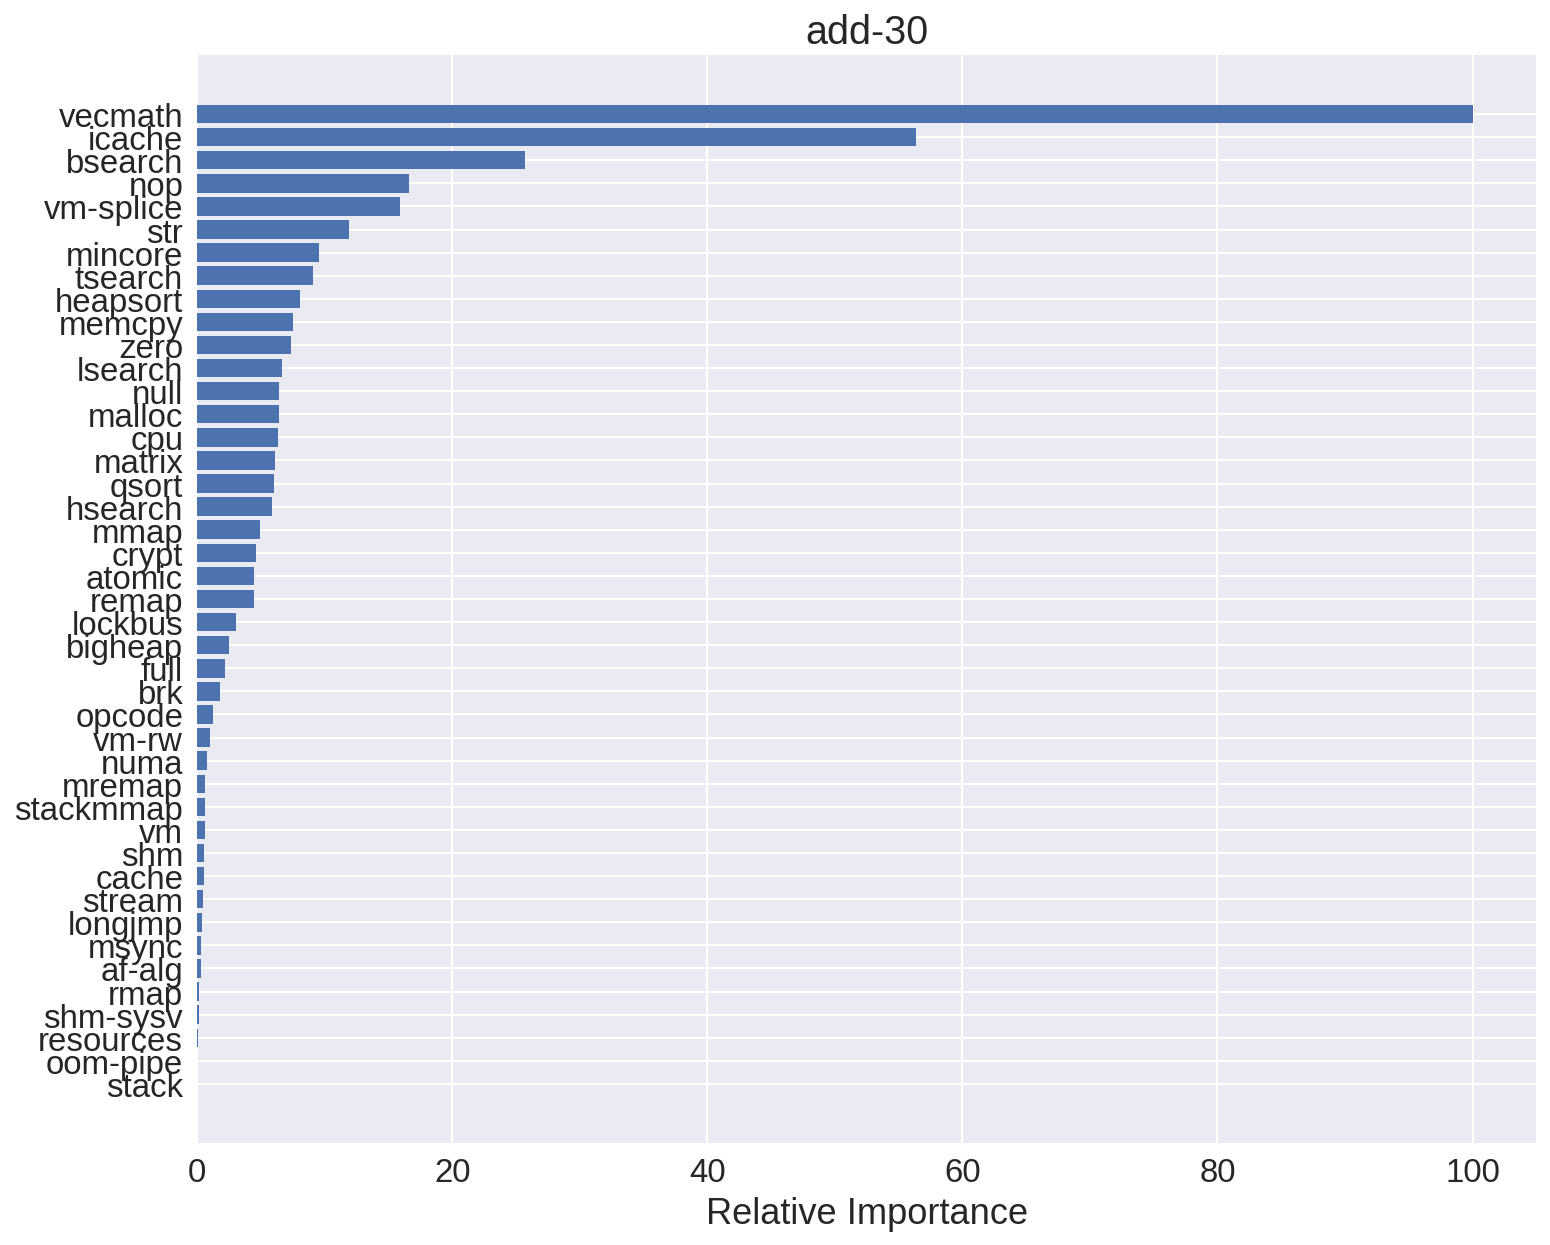

In [24]:
apps = ['ssca', 'hpccg', 'sklearn', 'redis-set', 'redis-get', 'innodb_load', 'memory_load', 'add-1', 'add-2', 'add-4', 'add-6', 'add-8', 'add-10', 'add-12', 'add-14', 'add-16', 'add-18', 'add-20']
plot_importance(get_features(df), stressors, apps)

# underfit

In [29]:
underfit_data = get_features(subdf.query('machine == "pc3300.quiho.emulab-net.uky.emulab.net" or machine == "pc3000.quiho.emulab-net.uky.emulab.net"'))

# show how many datapoints we have
len(underfit_data)

3

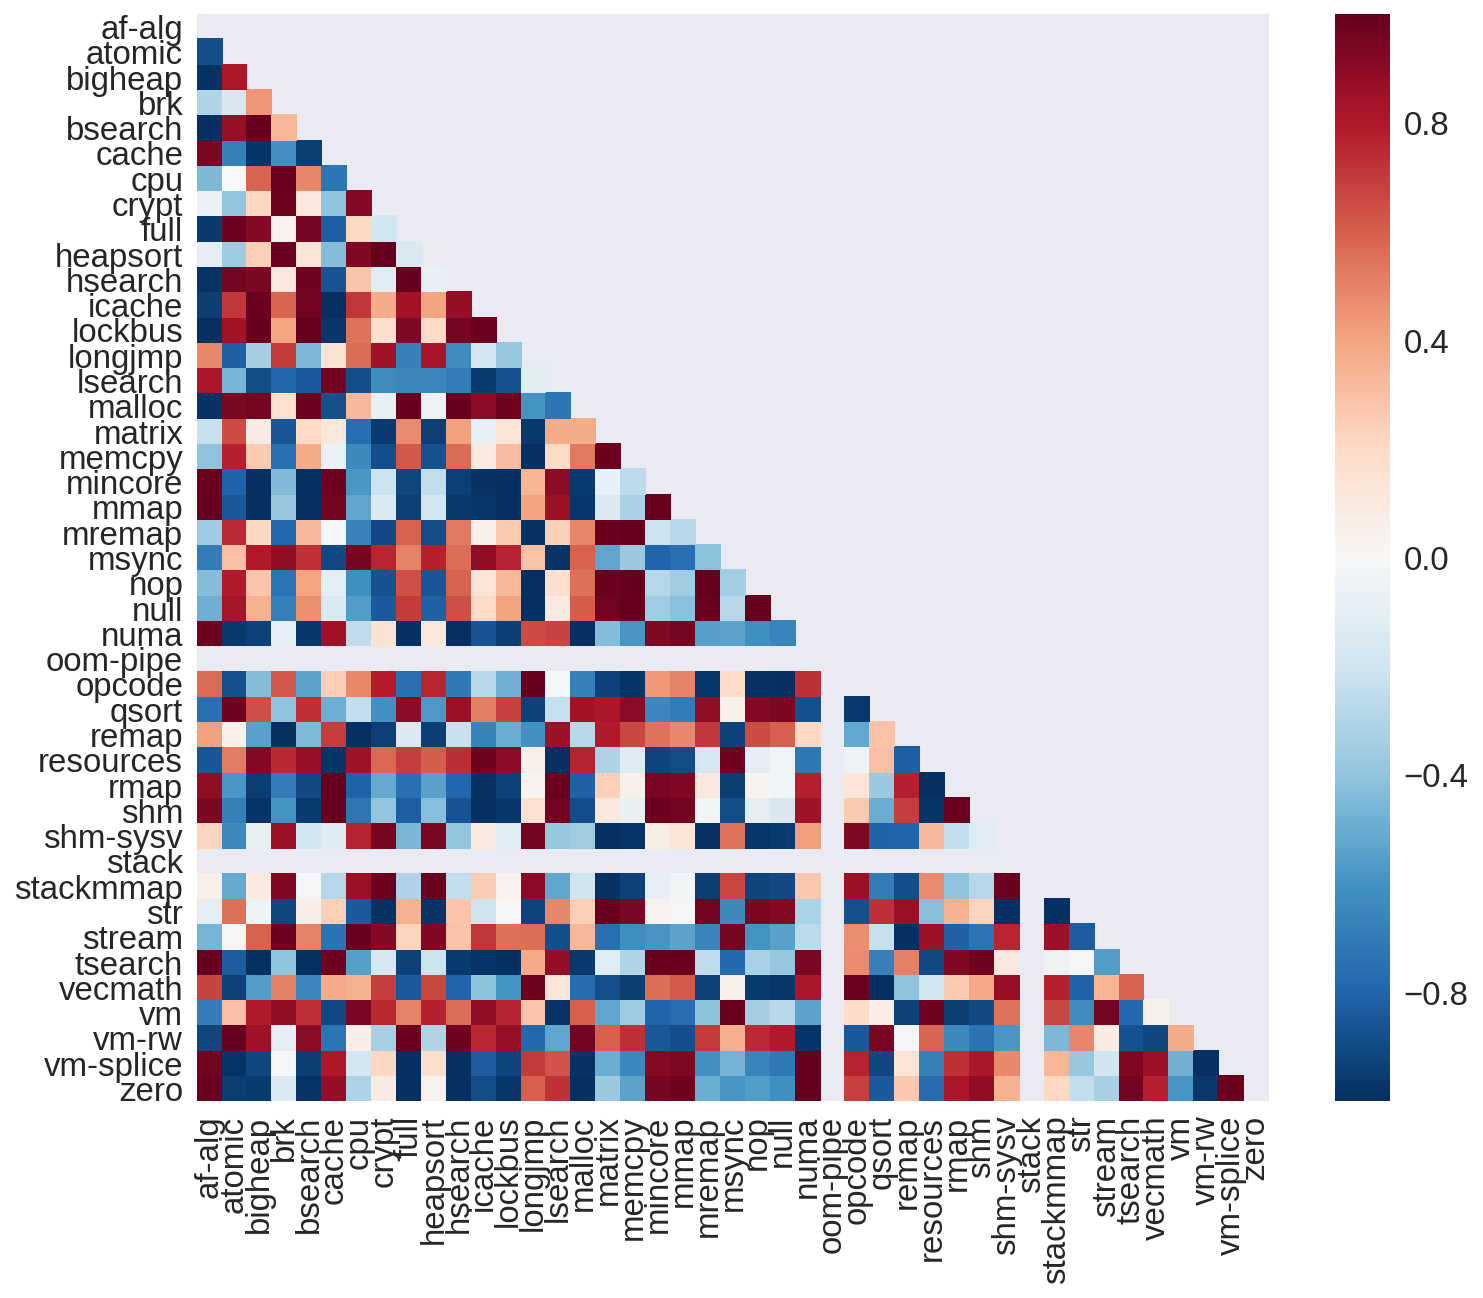

In [30]:
corr_matrix = plot_corrmatrix(underfit_data[stressors], file_suffix='_underfit')
plt.savefig('figures/corrmatrix_underfit.png', dpi=300, bbox_inches='tight')

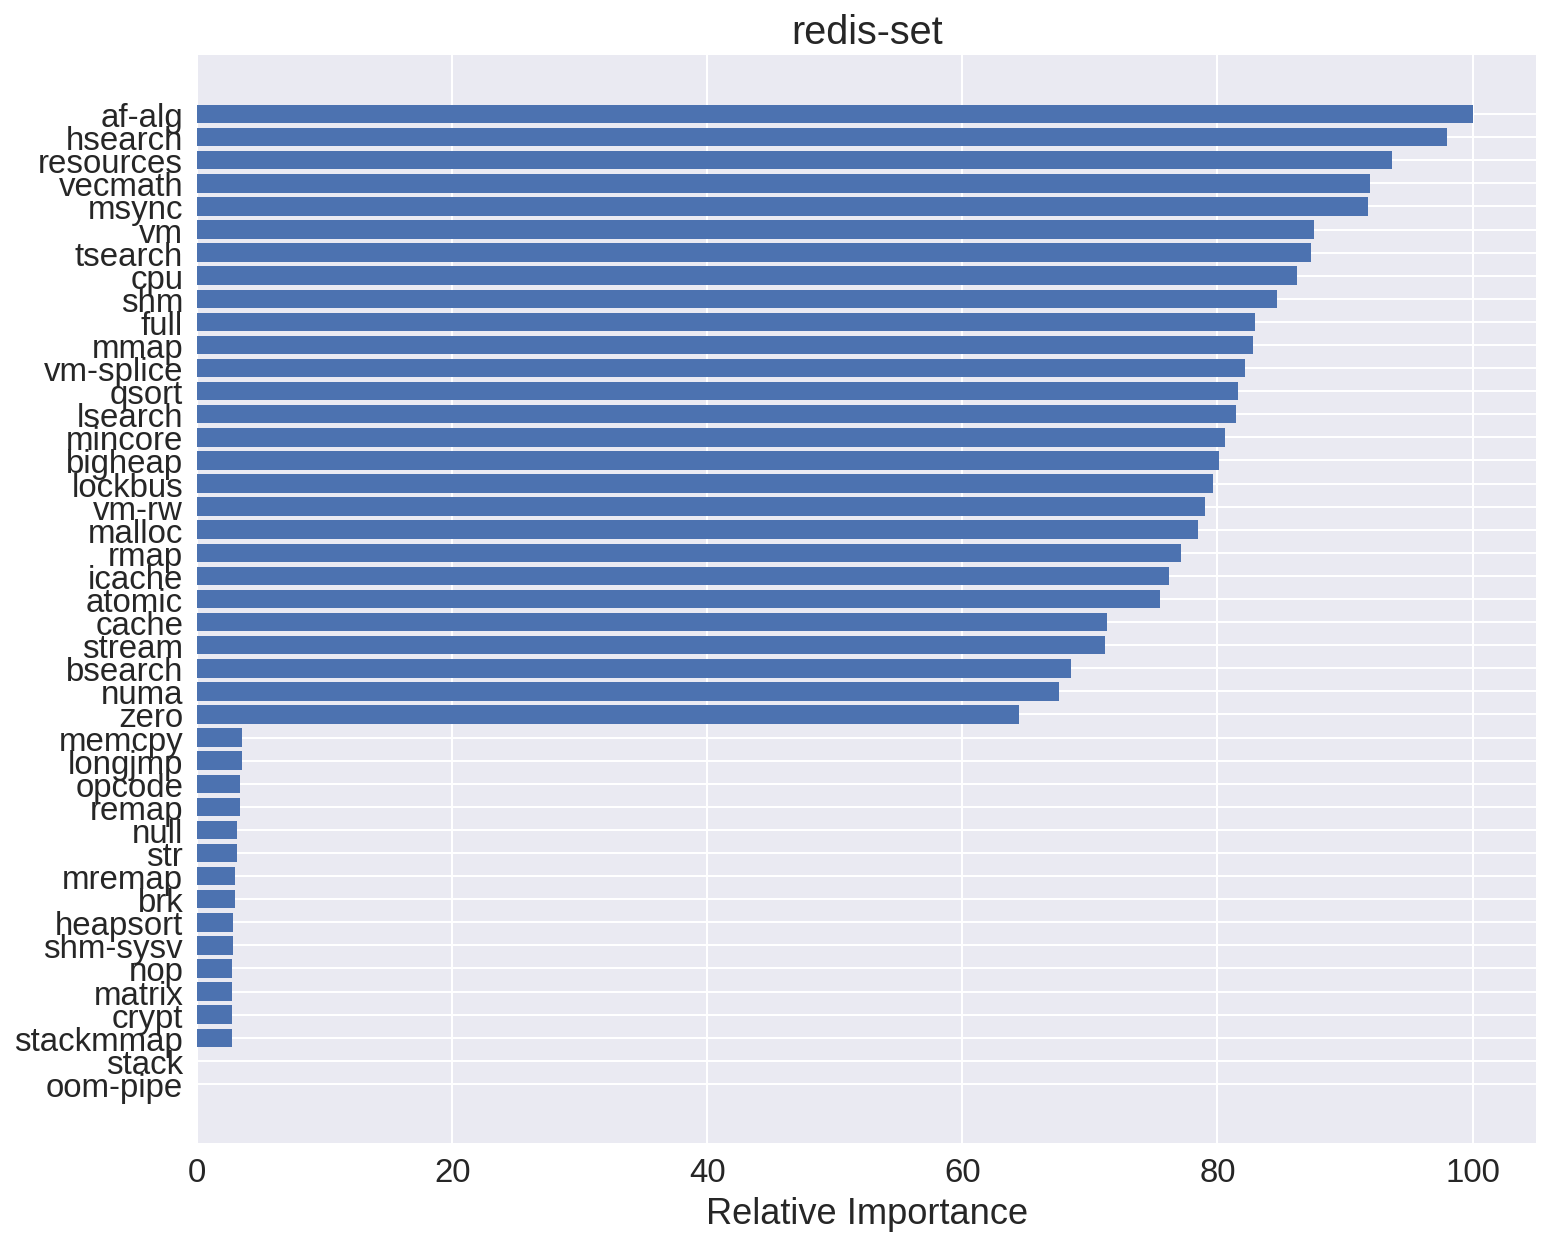

In [33]:
plot_importance(underfit_data, stressors, ['redis-set'], file_suffix='_underfit')

# stream-nadds behavior

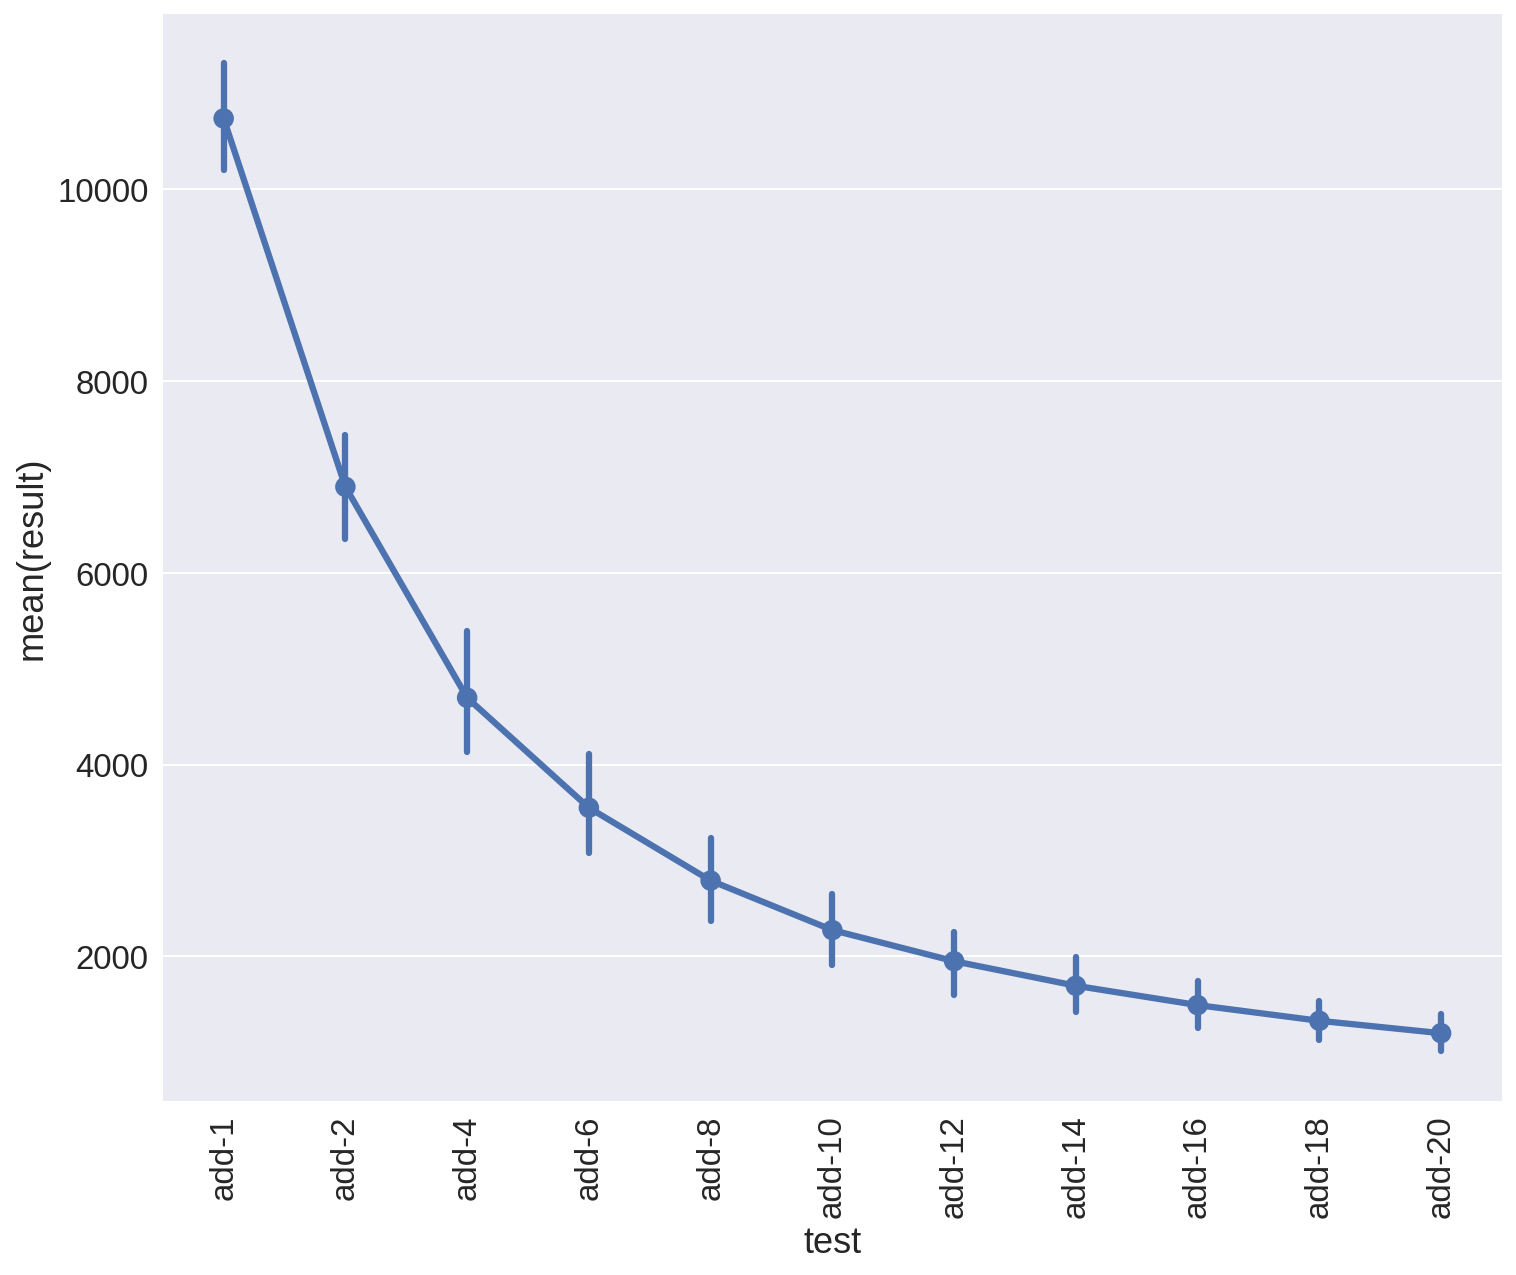

In [27]:
sns.pointplot(x='test', y='result', data=df[df['test'].str.startswith('add')].query('benchmark == "stream"'), order=['add-1'] + ['add-{}'.format(i) for i in range(2,22,2)])
plt.xticks(rotation=90)
plt.savefig('figures/stream-nadds-behavior.png', dpi=300, bbox_inches='tight')

# regressions

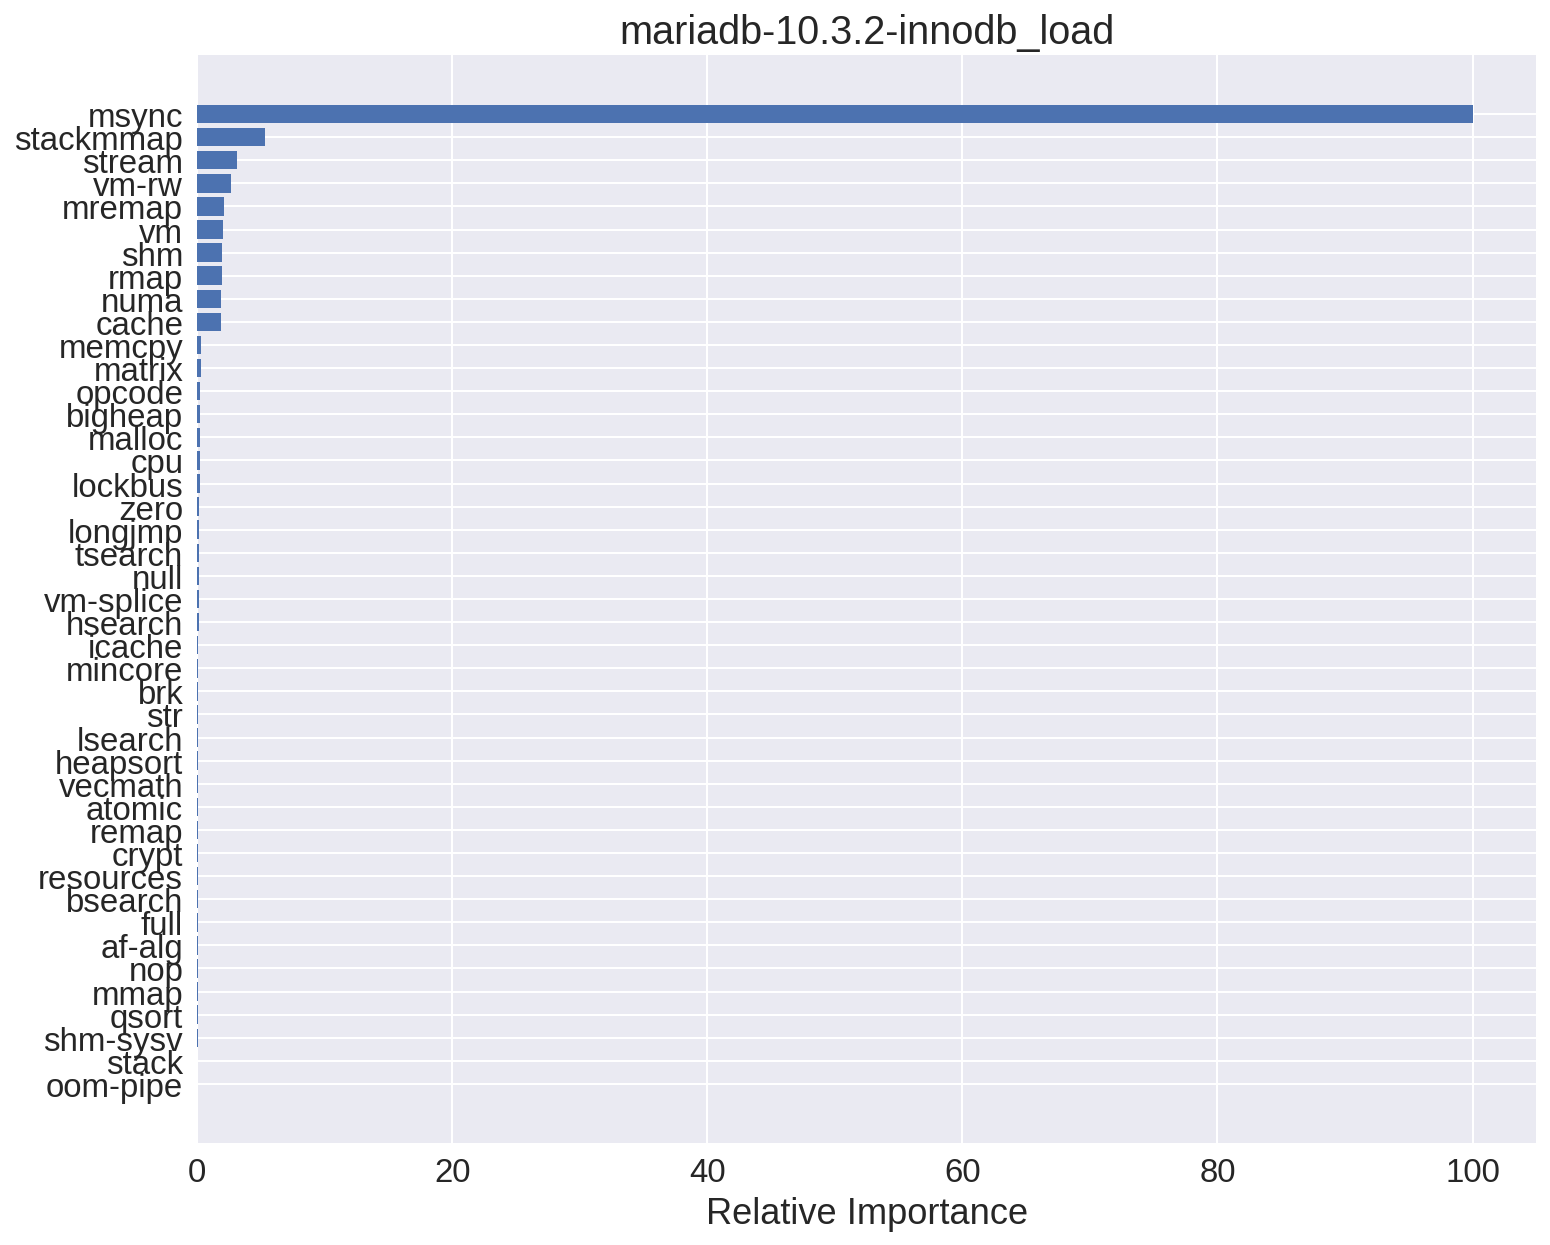

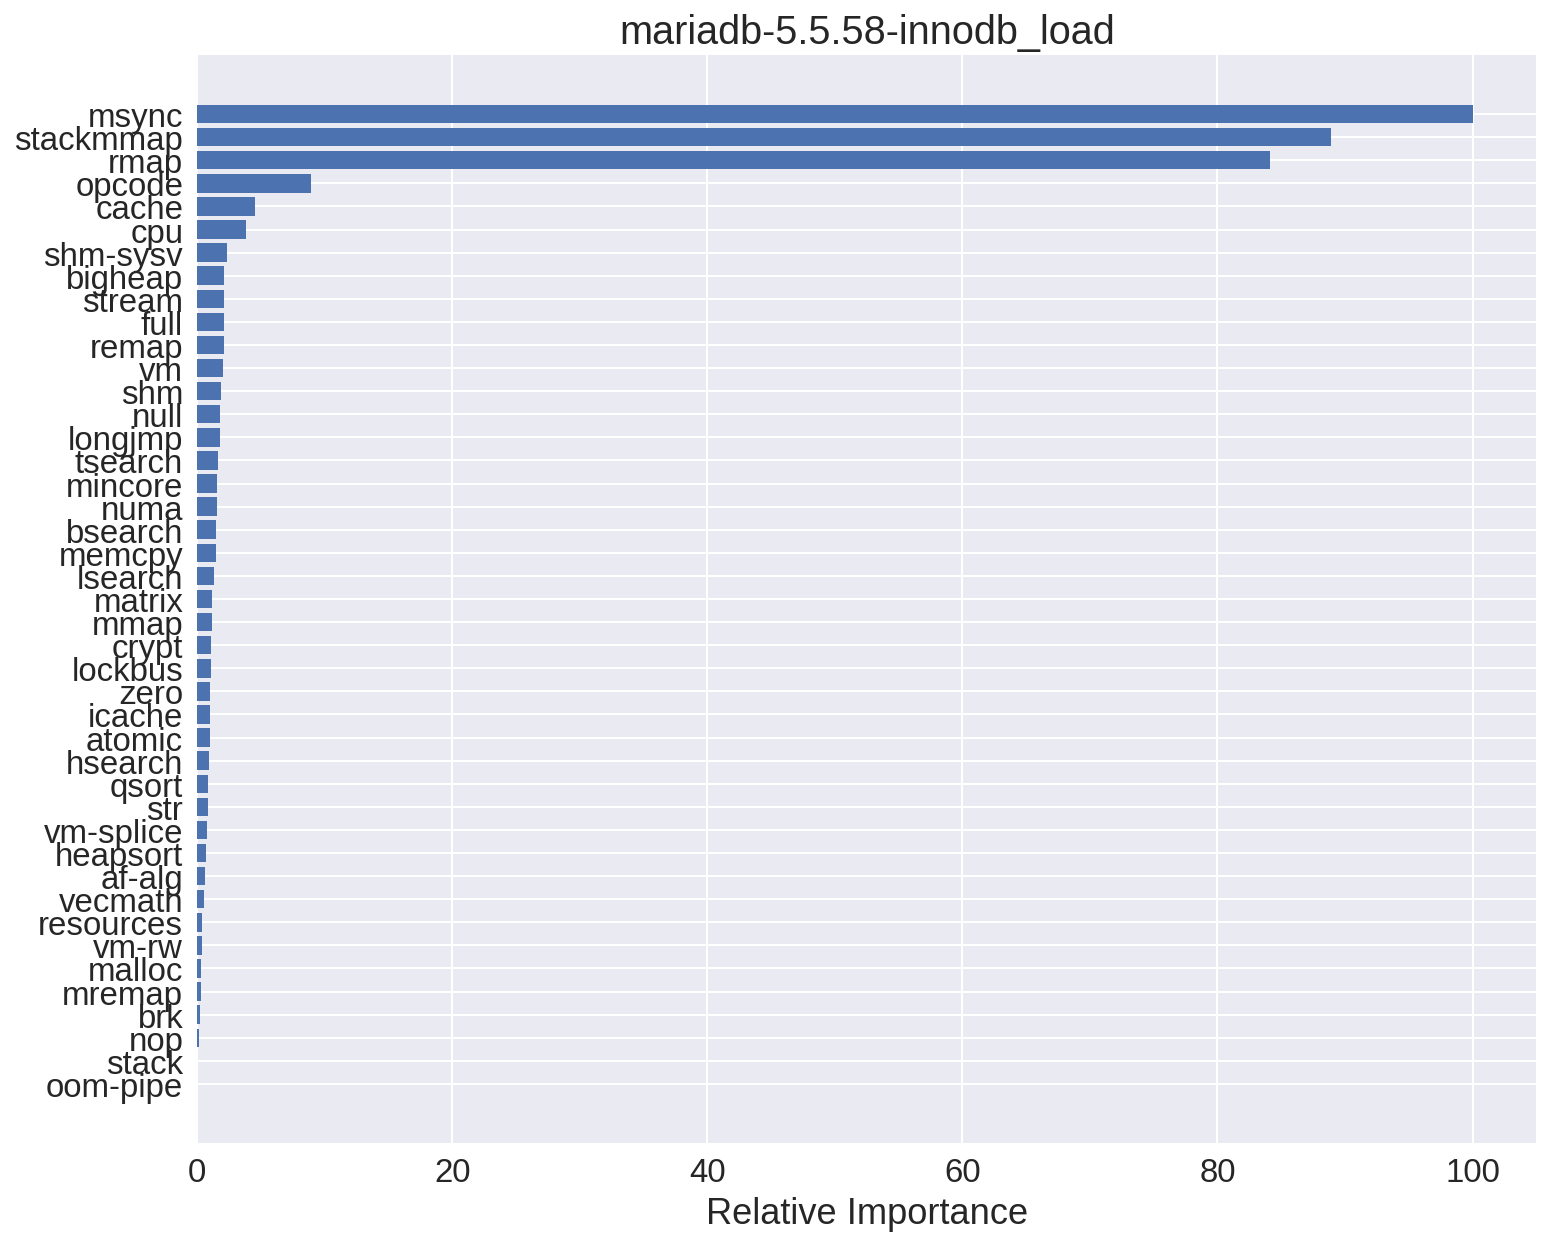

In [28]:
apps = ['mariadb-10.3.2-innodb_load', 'mariadb-5.5.58-innodb_load']
plot_importance(get_features(df), stressors, apps)